

---

# **Introduction**
The COVID-19 pandemic has affected the world in unprecedented ways, and India is no exception. With over 32M confirmed cases and  428K deaths, India has been one of the worst-hit countries. In this project, we aim to analyze the COVID-19 data from various Indian states to understand the impact of the virus and the response of the states to contain it.
---



#Participant

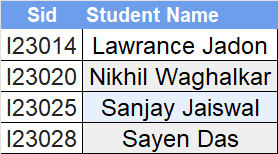![image.png]()

# Obejectives

**Ques 1 : Which age group is most affected by covid-19?**

**Ques 2 : which states were affected maximum by Covid(total cases & total Death)**

**Ques 3 : Which all places you find there were large infiltrations of foreigners.**

**Ques 4 : Which states were the most effective in administering the vaccine dosages, testing for the positivity, hospital management.**

**Ques 5 : Mortality rate, state population to show some 
         interesting insights**
         
**Ques 6 : Number of ICMR testing labs in every state/UT**

#Mouting the drive

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
filepath = "/content/drive/MyDrive/DMP_Project_Sem1/"
!ls "/content/drive/MyDrive/DMP_Project_Sem1"

# #/content/drive/MyDrive/COVID-19-India

 AgeGroupDetails.csv	       ICMRTestingLabs.csv
 covid_19_india.csv	       IndividualDetails.csv
 covid_vaccine_statewise.csv   Instructions.docx
'DMP project_copy.ipynb'       population_india_census2011.csv
 DMP_Project_Final.ipynb       StatewiseTestingDetails.csv
 HospitalBedsIndia.csv	       TExt.txt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.ticker import FuncFormatter


#Loading the files

In [96]:
age        = pd.read_csv(filepath + '../DMP_Project_Sem1/AgeGroupDetails.csv')
covid      = pd.read_csv(filepath + '../DMP_Project_Sem1/covid_19_india.csv')
vaccine    = pd.read_csv(filepath + '../DMP_Project_Sem1/covid_vaccine_statewise.csv')
beds       = pd.read_csv(filepath + '../DMP_Project_Sem1/HospitalBedsIndia.csv')
lab        = pd.read_csv(filepath + '../DMP_Project_Sem1/ICMRTestingLabs.csv')
indivisual = pd.read_csv(filepath + '../DMP_Project_Sem1/IndividualDetails.csv')
pop        = pd.read_csv(filepath + '../DMP_Project_Sem1/population_india_census2011.csv')
test       = pd.read_csv(filepath + '../DMP_Project_Sem1/StatewiseTestingDetails.csv')

# Data Cleaning

##AgeGroupDetails

In [97]:
age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [98]:
age.dtypes

Sno            int64
AgeGroup      object
TotalCases     int64
Percentage    object
dtype: object

In [99]:
percent=age['Percentage'].str.split("%",n=1,expand= True)
age['Percentage']=percent[0].astype(float)

In [100]:
age.dtypes

Sno             int64
AgeGroup       object
TotalCases      int64
Percentage    float64
dtype: object

In [101]:
age.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18
1,2,10-19,27,3.90
2,3,20-29,172,24.86
3,4,30-39,146,21.10
4,5,40-49,112,16.18


In [102]:
age=age[age['AgeGroup']!='Missing']
age

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18
1,2,10-19,27,3.90
2,3,20-29,172,24.86
3,4,30-39,146,21.10
4,5,40-49,112,16.18
5,6,50-59,77,11.13
6,7,60-69,89,12.86
7,8,70-79,28,4.05
8,9,>=80,10,1.45


##covid_19_india

In [103]:
covid.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0,0,1


In [104]:
#cleaning columns
covid.drop('Time',axis=1, inplace = True)    #removing un-necceesory columns

covid.rename(columns = {'Confirmed':'TotalCases',
                        'State/UnionTerritory':'State/UT'}, inplace = True) # column name update


In [105]:
covid.head(2)

,Sno,Date,State/UT,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,TotalCases
0,1,30-01-2020,Kerala,1,0,0,0,1
1,2,31-01-2020,Kerala,1,0,0,0,1


In [106]:
covid.isna().sum()  # missing value checking

Sno                         0
Date                        0
State/UT                    0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
TotalCases                  0
dtype: int64

In [107]:
covid['State/UT'].sort_values().unique()   # Checking data consistency for column - State/UnionTerritory

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [108]:
# Replacing mis-spelled State/UnionTerritory with currect version of their names

covid['State/UT'].replace('Bihar****','Bihar', inplace= True)                       # 'Bihar****','Bihar'
covid['State/UT'].replace('Himanchal Pradesh','Himachal Pradesh', inplace= True)    # 'Himanchal Pradesh','Himachal Pradesh'
covid['State/UT'].replace('Karanataka','Karnataka', inplace= True)                  # 'Karanataka', 'Karnataka'
covid['State/UT'].replace('Madhya Pradesh***','Madhya Pradesh', inplace= True)      # 'Madhya Pradesh', 'Madhya Pradesh***'
covid['State/UT'].replace('Maharashtra***','Maharashtra', inplace= True)            # 'Maharashtra','Maharashtra***'
covid['State/UT'].replace('Telengana','Telangana', inplace= True)                   # 'Telangana', 'Telengana'

In [109]:
# Checking row counts --> 'Dadra and Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu' & 'Daman & Diu' 
covid[covid['State/UT'].isin(['Dadra and Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu','Daman & Diu'])]['State/UT'].value_counts()


Dadra and Nagar Haveli and Daman and Diu    461
Dadra and Nagar Haveli                        2
Daman & Diu                                   1
Name: State/UT, dtype: int64



---


*As the count row counts are very less for 'Dadra and Nagar Haveli' & 'Daman & Diu', will merge them under 'State/UnionTerritory' name - 'Dadra and Nagar Haveli and Daman and Diu'*


---



In [110]:
# Merging 'Dadra and Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu' & 'Daman & Diu' to 'Dadra and Nagar Haveli and Daman and Diu'

covid['State/UT'].replace('Dadra and Nagar Haveli','Dadra and Nagar Haveli and Daman and Diu', inplace= True)
covid['State/UT'].replace('Daman & Diu','Dadra and Nagar Haveli and Daman and Diu', inplace= True) 

In [111]:
covid['State/UT'].sort_values().unique()   # Checking data consistency for state/union territory names after cleaning

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [112]:
# Analysing  ---> 'Unassigned' & 'Cases being reassigned to states' cases
covid['State/UT'].value_counts(normalize= True)*100

Kerala                                      3.092214
Delhi                                       2.915516
Telangana                                   2.915516
Rajasthan                                   2.909994
Uttar Pradesh                               2.904473
Haryana                                     2.904473
Ladakh                                      2.887907
Tamil Nadu                                  2.887907
Punjab                                      2.876864
Jammu and Kashmir                           2.876864
Maharashtra                                 2.876864
Karnataka                                   2.876864
Andhra Pradesh                              2.860298
Uttarakhand                                 2.843733
Odisha                                      2.838211
Puducherry                                  2.827167
West Bengal                                 2.827167
Chhattisgarh                                2.821645
Chandigarh                                  2.



---


*As we can see percentage contribution of 'Cases being reassigned to states' & 'Unassigned' is less than 1%, we can drop these rows*


---



In [113]:
# Dropping row with values - 'Cases being reassigned to states' & 'Unassigned'
print(covid.shape)
covid.drop(covid[covid['State/UT']=='Cases being reassigned to states'].index,axis=0, inplace= True)
covid.drop(covid[covid['State/UT']=='Unassigned'].index,axis=0, inplace= True)
print(covid.shape)

(18110, 8)
(18047, 8)


In [114]:
print(covid['State/UT'].sort_values().unique()) # Checking data consistency for state/union territory names
len(covid['State/UT'].sort_values().unique())   # Number of states/UT

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Ladakh' 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


36

In [115]:
covid.isna().sum() # checking for missing values

Sno                         0
Date                        0
State/UT                    0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
TotalCases                  0
dtype: int64

In [116]:
covid.dtypes  # checking the data types

Sno                          int64
Date                        object
State/UT                    object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
TotalCases                   int64
dtype: object

As we can see, ConfirmedIndianNational & ConfirmedForeignNational having data type as object, we need to change it to integer

In [117]:
covid['ConfirmedIndianNational'].value_counts()

-      17601
1        108
3         73
2         33
4         21
       ...  
41         1
86         1
87         1
45         1
110        1
Name: ConfirmedIndianNational, Length: 62, dtype: int64

In [118]:
# replacing '-' with 0
#covid['ConfirmedIndianNational']=covid['ConfirmedIndianNational'].replace('-','0')
#covid['ConfirmedForeignNational']=covid['ConfirmedForeignNational'].replace('-','0')

In [119]:
# conveting object dtype to int for columns 'ConfirmedIndianNational' & 'ConfirmedForeignNational'
#covid['ConfirmedIndianNational']=covid['ConfirmedIndianNational'].astype(int)
#covid['ConfirmedForeignNational']=covid['ConfirmedForeignNational'].astype(int)
#covid.dtypes     # checking data types again  

In [120]:
covid = covid.sort_values('State/UT')  # sate name wise sorted

In [121]:
covid['ConfirmedForeignNational'].unique()


array(['-', '0', '1', '14', '2', '7', '8', '3', '6', '10', '11', '9'],
      dtype=object)

In [122]:
covid.replace('-' , 0, inplace = True)
covid['ConfirmedForeignNational'] = covid['ConfirmedForeignNational'].astype('int64')
covid['ConfirmedForeignNational'].unique()

array([ 0,  1, 14,  2,  7,  8,  3,  6, 10, 11,  9])

##covid_vaccine_statewise

In [123]:
vaccine.head(2)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1,17-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [124]:
# column name update
vaccine.rename(columns = {'Updated On':'Date',
                          'State' :'State/UT'}, 
               inplace = True) 

In [125]:
vaccine.head(2)

,Date,State/UT,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1,17-01-2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0


In [126]:
vaccine.columns

Index(['Date', 'State/UT', 'Total Doses Administered', 'Sessions', ' Sites ',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [127]:
#Dropping unwanted columns
vaccine.drop(['Sessions', ' Sites ','First Dose Administered', 'Second Dose Administered',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)'],
       axis=1, inplace= True)

In [128]:
vaccine.head(2)

,Date,State/UT,Total Doses Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,Andaman and Nicobar Islands,23.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0
1,17-01-2021,Andaman and Nicobar Islands,23.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0


In [129]:
vaccine['State/UT'].sort_values().unique()    # Checking data consistency for state/union territory names

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'India',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [130]:
vaccine.dtypes   # checking data types

Date                                    object
State/UT                                object
Total Doses Administered               float64
Male (Doses Administered)              float64
Female (Doses Administered)            float64
Transgender (Doses Administered)       float64
 Covaxin (Doses Administered)          float64
CoviShield (Doses Administered)        float64
Sputnik V (Doses Administered)         float64
Male(Individuals Vaccinated)           float64
Female(Individuals Vaccinated)         float64
Transgender(Individuals Vaccinated)    float64
Total Individuals Vaccinated           float64
dtype: object

In [131]:
# Seprateing data from India & Other states
#vaccine_india = vaccine[vaccine['State/UT']=='India']
vaccine_state = vaccine[vaccine['State/UT']!='India']

### Cleaning Vaccine_State data

In [132]:
vaccine_state.isna().sum()/vaccine_state.shape[0]*100                   # Checking for missing values.

Date                                     0.00000
State/UT                                 0.00000
Total Doses Administered                 2.85602
Male (Doses Administered)                2.85602
Female (Doses Administered)              2.85602
Transgender (Doses Administered)         2.85602
 Covaxin (Doses Administered)            2.85602
CoviShield (Doses Administered)          2.85602
Sputnik V (Doses Administered)          61.82366
Male(Individuals Vaccinated)           100.00000
Female(Individuals Vaccinated)         100.00000
Transgender(Individuals Vaccinated)    100.00000
Total Individuals Vaccinated            24.55129
dtype: float64



---


We can see here that except column 'Male(Individuals Vaccinated) ,Female(Individuals Vaccinated) & Transgender(Individuals Vaccinated) ' every other column having 100% missing values. We can drop them


---



In [133]:
# Dropping the columns having more than 50% data missing
vaccine_state.drop(['Male(Individuals Vaccinated)',
                    'Female(Individuals Vaccinated)',
                    'Transgender(Individuals Vaccinated)'],axis=1, inplace= True)

<ipython-input-133-1f75eaba3ee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_state.drop(['Male(Individuals Vaccinated)',


In [134]:
vaccine_state.isna().sum()/vaccine_state.shape[0]*100    # Checking for missing values.

Date                                 0.00000
State/UT                             0.00000
Total Doses Administered             2.85602
Male (Doses Administered)            2.85602
Female (Doses Administered)          2.85602
Transgender (Doses Administered)     2.85602
 Covaxin (Doses Administered)        2.85602
CoviShield (Doses Administered)      2.85602
Sputnik V (Doses Administered)      61.82366
Total Individuals Vaccinated        24.55129
dtype: float64

In [135]:
vaccine_state.isna().sum()/vaccine_state.shape[0]*100    # final check

Date                                 0.00000
State/UT                             0.00000
Total Doses Administered             2.85602
Male (Doses Administered)            2.85602
Female (Doses Administered)          2.85602
Transgender (Doses Administered)     2.85602
 Covaxin (Doses Administered)        2.85602
CoviShield (Doses Administered)      2.85602
Sputnik V (Doses Administered)      61.82366
Total Individuals Vaccinated        24.55129
dtype: float64

In [136]:
vaccine_state.dtypes

Date                                 object
State/UT                             object
Total Doses Administered            float64
Male (Doses Administered)           float64
Female (Doses Administered)         float64
Transgender (Doses Administered)    float64
 Covaxin (Doses Administered)       float64
CoviShield (Doses Administered)     float64
Sputnik V (Doses Administered)      float64
Total Individuals Vaccinated        float64
dtype: object

## Hospital Beds India

In [137]:
beds.head(2)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658


In [138]:
beds['State/UT'].sort_values().unique()                   # checking Consistency of data

array(['All India', 'Andaman & Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [139]:
beds.isna().sum()/beds.shape[0]*100    # Checking for missing values.

Sno                                  0.000000
State/UT                             0.000000
NumPrimaryHealthCenters_HMIS         0.000000
NumCommunityHealthCenters_HMIS       0.000000
NumSubDistrictHospitals_HMIS        18.918919
NumDistrictHospitals_HMIS            0.000000
TotalPublicHealthFacilities_HMIS     0.000000
NumPublicBeds_HMIS                   0.000000
NumRuralHospitals_NHP18              0.000000
NumRuralBeds_NHP18                   0.000000
NumUrbanHospitals_NHP18              0.000000
NumUrbanBeds_NHP18                   0.000000
dtype: float64

In [140]:
beds['State/UT'].value_counts()   # checking frequnecy of each value in column State/UT

Andaman & Nicobar Islands    1
Madhya Pradesh               1
Manipur                      1
Meghalaya                    1
Mizoram                      1
Nagaland                     1
Odisha                       1
Puducherry                   1
Punjab                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttar Pradesh                1
Uttarakhand                  1
West Bengal                  1
Maharashtra                  1
Lakshadweep                  1
Andhra Pradesh               1
Kerala                       1
Arunachal Pradesh            1
Assam                        1
Bihar                        1
Chandigarh                   1
Chhattisgarh                 1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal


---
As the frequncy of each state is 1, we can't drop any row.
We will replace missing values with zero

---




In [141]:
# replacing missing values with zero
beds.fillna(0, inplace=True)           # replacing
beds.isna().sum()/beds.shape[0]*100    # Final check for missing values.

Sno                                 0.0
State/UT                            0.0
NumPrimaryHealthCenters_HMIS        0.0
NumCommunityHealthCenters_HMIS      0.0
NumSubDistrictHospitals_HMIS        0.0
NumDistrictHospitals_HMIS           0.0
TotalPublicHealthFacilities_HMIS    0.0
NumPublicBeds_HMIS                  0.0
NumRuralHospitals_NHP18             0.0
NumRuralBeds_NHP18                  0.0
NumUrbanHospitals_NHP18             0.0
NumUrbanBeds_NHP18                  0.0
dtype: float64

In [142]:
beds.dtypes   # checking data type

Sno                                   int64
State/UT                             object
NumPrimaryHealthCenters_HMIS         object
NumCommunityHealthCenters_HMIS        int64
NumSubDistrictHospitals_HMIS        float64
NumDistrictHospitals_HMIS             int64
TotalPublicHealthFacilities_HMIS      int64
NumPublicBeds_HMIS                    int64
NumRuralHospitals_NHP18               int64
NumRuralBeds_NHP18                    int64
NumUrbanHospitals_NHP18               int64
NumUrbanBeds_NHP18                    int64
dtype: object

In [143]:
beds['NumSubDistrictHospitals_HMIS']=beds['NumSubDistrictHospitals_HMIS'].astype(int)

In [144]:
# Seperate india and state/Ut data 
#beds_india=beds[beds['State/UT']=='All India']
beds_state=beds[beds['State/UT']!='All India']

###Hospital beds_state

In [145]:
beds_state.dtypes

Sno                                  int64
State/UT                            object
NumPrimaryHealthCenters_HMIS        object
NumCommunityHealthCenters_HMIS       int64
NumSubDistrictHospitals_HMIS         int64
NumDistrictHospitals_HMIS            int64
TotalPublicHealthFacilities_HMIS     int64
NumPublicBeds_HMIS                   int64
NumRuralHospitals_NHP18              int64
NumRuralBeds_NHP18                   int64
NumUrbanHospitals_NHP18              int64
NumUrbanBeds_NHP18                   int64
dtype: object

In [146]:
beds_state['NumPrimaryHealthCenters_HMIS'] = beds_state['NumPrimaryHealthCenters_HMIS'].astype(int)

<ipython-input-146-facc39654ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beds_state['NumPrimaryHealthCenters_HMIS'] = beds_state['NumPrimaryHealthCenters_HMIS'].astype(int)


In [147]:
beds_state['State/UT'].sort_values().unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [148]:
beds_state.replace(to_replace=["Andaman & Nicobar Islands"],value="Andaman and Nicobar Islands", inplace = True)
beds_state.replace(to_replace=["Jammu & Kashmir"],value="Jammu and Kashmir", inplace = True)
#beds_state.replace(to_replace=["Dadra & Nagar Haveli", 'Daman & Diu'],value="Dadra and Nagar Haveli and Daman and Diu", inplace = True)

<ipython-input-148-2b211d08e66e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beds_state.replace(to_replace=["Andaman & Nicobar Islands"],value="Andaman and Nicobar Islands", inplace = True)
<ipython-input-148-2b211d08e66e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beds_state.replace(to_replace=["Jammu & Kashmir"],value="Jammu and Kashmir", inplace = True)


### Hosptital beds_india

##ICMRTestingLabs

In [149]:
lab.head(2)

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site


In [150]:
lab.rename(columns = {'state':'State/UT',
                      'lab':'Lab',
                      'type':'InstituteType',
                      'address':'Address',
                      'city':'City'}, inplace = True) # column name update

In [151]:
lab['City'].sort_values().unique()    # checking Consistency of data

array(['Agartala', 'Agra', 'Ahmedabad', 'Aizawl', 'Ajmer', 'Aligarh',
       'Amritsar', 'Anantapur', 'Aurangabad', 'Barpeta', 'Belagavi',
       'Bellary', 'Bengaluru', 'Berhampur', 'Bhavnagar', 'Bhopal',
       'Bhubaneswar', 'Bikaner', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Cuttack', 'Darbhanga', 'Dehradun', 'Dhanbad', 'Dharmapuri',
       'Dhule', 'Dibrugarh', 'Ernakulam', 'Faridabad', 'Faridkot',
       'Gangtok', 'Goa', 'Gorakhpur', 'Greater Noida', 'Gulbarga',
       'Guntur', 'Gurugram', 'Guwahati', 'Gwalior', 'Haldwani', 'Hassan',
       'Hisar', 'Hubli', 'Hyderabad', 'Imphal', 'Indore', 'Jabalpur',
       'Jagdalpur', 'Jaipur', 'Jammu', 'Jamnagar', 'Jamshedpur',
       'Jhalawar', 'Jhansi', 'Jodhpur', 'Jorhat', 'Kakinada', 'Kangra',
       'Kanpur', 'Karnal', 'Kasaragod', 'Kasauli', 'Kolkata', 'Kota',
       'Kozhikode', 'Ladakh', 'Lucknow', 'Ludhiana', 'Madurai', 'Malda',
       'Mangalore', 'Meerut', 'Midnapore', 'Miraj', 'Mumbai',
       'Muzaffarpur', 'Mysuru', 'N

In [152]:
lab['State/UT'].sort_values().unique()    # checking Consistency of data

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [153]:
lab.dtypes

Lab              object
Address          object
pincode           int64
City             object
State/UT         object
InstituteType    object
dtype: object

In [154]:
# Checking for all data values to check if any abnormal value in any column. 
for i in lab.columns:
    print(lab[i].value_counts().sort_index(ascending=False))
    print("---------------------------------------------------")

iGenetic Diagnostics Pvt. Ltd., Mumbai                                                                         1
Zoram Medical College, Aizwal                                                                                  1
Y. R. Gaitonde Centre for AIDS Research and Education (YRG Care), Chennai                                      1
Wenlock District Hospital, Mangalore                                                                           1
Vimta Labs Ltd., Hyderabad                                                                                     1
                                                                                                              ..
Advanced Centre for Treatment, Research and Education in Cancer (ACTREC), Tata Memorial Centre, Navi Mumbai    1
Aditya Birla Memorial Hospital –Laboratory (A Unit of Aditya Birla Health Services Ltd.), Pune                 1
AMRI Hospitals, Department of Laboratory Medicine, Kolkata                                      

In [155]:
lab['InstituteType'].sort_values().unique()    # checking Consistency of data

array(['Collection Site', 'Government Laboratory', 'Private Laboratory'],
      dtype=object)

In [156]:
lab.isna().sum()/lab.shape[0]*100     # checking for missing values

Lab              0.0
Address          0.0
pincode          0.0
City             0.0
State/UT         0.0
InstituteType    0.0
dtype: float64

In [157]:
lab.dtypes

Lab              object
Address          object
pincode           int64
City             object
State/UT         object
InstituteType    object
dtype: object

##IndividualDetails

In [158]:
indivisual.head(2)

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30-01-2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14-02-2020,Travelled from Wuhan
1,1,KL-AL-P1,02-02-2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14-02-2020,Travelled from Wuhan


In [159]:
indivisual.shape

(28182, 12)

In [160]:
indivisual.isna().sum()/indivisual.shape[0]*100    # checking for missing values

id                     0.000000
government_id         89.365552
diagnosed_date         0.000000
age                   91.675538
gender                81.147541
detected_city         91.661344
detected_district     24.781776
detected_state         0.000000
nationality           90.387481
current_status         0.000000
status_change_date     1.426442
notes                  4.737066
dtype: float64

##population_india_census2011

In [161]:
pop.head(2)

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929


In [162]:
pop.rename(columns = {'State / Union Territory':'State/UT',
                      'Rural population':'Rural_population',
                      'Urban population':'Urban_population',
                      'Population':'Total_population',
                      'Density': 'Population_density'
                      }, inplace = True) # column name update

In [163]:
pop.head(2)

,Sno,State/UT,Total_population,Rural_population,Urban_population,Area,Population_density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929


In [164]:
pop.isna().sum()  # Checking for missing value

Sno                   0
State/UT              0
Total_population      0
Rural_population      0
Urban_population      0
Area                  0
Population_density    0
Gender Ratio          0
dtype: int64

In [165]:
pop['State/UT'].sort_values().unique()    # checking data consistency

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telengana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [166]:
pop['State/UT'].value_counts()               # Checking for duplicate data

Uttar Pradesh                               1
Maharashtra                                 1
Tripura                                     1
Meghalaya                                   1
Manipur                                     1
Nagaland                                    1
Goa                                         1
Arunachal Pradesh                           1
Mizoram                                     1
Sikkim                                      1
Delhi                                       1
Jammu and Kashmir                           1
Puducherry                                  1
Chandigarh                                  1
Dadra and Nagar Haveli and Daman and Diu    1
Andaman and Nicobar Islands                 1
Ladakh                                      1
Himachal Pradesh                            1
Uttarakhand                                 1
Haryana                                     1
Gujarat                                     1
Bihar                             

As no State/UT appears twice, data is having no duplicate row

In [167]:
/#modify Area column
area_km2=pop['Area'].str.split("km2",n=1,expand= True)
pop['Area(km2)']=area_km2[0]
pop.drop(columns =['Area'], inplace = True)

#modify population_density column
pop_density=pop['Population_density'].str.split("/",n=1,expand= True)
pop['Pop_density(km2)']=pop_density[0]
pop.drop(columns =['Population_density'], inplace = True)

In [168]:
pop.head(1)

,Sno,State/UT,Total_population,Rural_population,Urban_population,Gender Ratio,Area(km2),Pop_density(km2)
0,1,Uttar Pradesh,199812341,155317278,44495063,912,"240,928",828


In [169]:
pop.dtypes

Sno                  int64
State/UT            object
Total_population     int64
Rural_population     int64
Urban_population     int64
Gender Ratio         int64
Area(km2)           object
Pop_density(km2)    object
dtype: object

In [170]:
# changing Area column data type to integer
pop['Area(km2)']=pop['Area(km2)'].str.replace(",","").str.strip()
pop['Area(km2)']=pd.to_numeric(pop['Area(km2)'])
pop['Area(km2)']

0     240928
1     307713
2      94163
3      88752
4     308245
5     130058
6     342239
7     191791
8     196024
9     162968
10    155707
11    112077
12     38863
13     79714
14     78438
15     50362
16    135191
17     44212
18     53483
19     55673
20     10486
21     22429
22     22327
23     16579
24      3702
25     83743
26     21081
27      7096
28      1484
29    125535
30       479
31       114
32       603
33      8249
34     96701
35        32
Name: Area(km2), dtype: int64

In [171]:
# changing population density column to type integer
pop['Pop_density(km2)']=pop['Pop_density(km2)'].str.replace(",","").str.strip()
pop['Pop_density(km2)']=pd.to_numeric(pop['Pop_density(km2)'])
pop['Pop_density(km2)']

0       828.0
1       365.0
2      1102.0
3      1029.0
4       236.0
5       555.0
6       201.0
7       319.0
8       308.0
9       303.0
10      269.0
11      312.0
12      859.0
13      414.0
14      397.0
15      550.0
16      189.0
17      573.0
18      189.0
19      123.0
20      350.0
21      132.0
22      122.0
23      119.0
24      394.0
25       17.0
26       52.0
27       86.0
28    11297.0
29       98.0
30     2598.0
31     9252.0
32      970.0
33       46.0
34        2.8
35     2013.0
Name: Pop_density(km2), dtype: float64

In [172]:
pop.dtypes

Sno                   int64
State/UT             object
Total_population      int64
Rural_population      int64
Urban_population      int64
Gender Ratio          int64
Area(km2)             int64
Pop_density(km2)    float64
dtype: object

In [173]:
pop['State/UT'].unique()

array(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka',
       'Gujarat', 'Andhra Pradesh', 'Odisha', 'Telengana', 'Kerala',
       'Jharkhand', 'Assam', 'Punjab', 'Chhattisgarh', 'Haryana',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya',
       'Manipur', 'Nagaland', 'Goa', 'Arunachal Pradesh', 'Mizoram',
       'Sikkim', 'Delhi', 'Jammu and Kashmir', 'Puducherry', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Ladakh', 'Lakshadweep'],
      dtype=object)

In [174]:
pop['State/UT'].replace('Telengana','Telangana',inplace=True)

In [175]:
pop['State/UT'].unique()

array(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka',
       'Gujarat', 'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala',
       'Jharkhand', 'Assam', 'Punjab', 'Chhattisgarh', 'Haryana',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya',
       'Manipur', 'Nagaland', 'Goa', 'Arunachal Pradesh', 'Mizoram',
       'Sikkim', 'Delhi', 'Jammu and Kashmir', 'Puducherry', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Ladakh', 'Lakshadweep'],
      dtype=object)

##StatewiseTestingDetails

In [176]:
test.head(2)

,Date,State,TotalSamples,Negative,Positive
0,17-04-2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,27.0


In [177]:
test.rename(columns={'State':'State/UT'}, inplace = True)    # Rename the columns name

In [178]:
test.head(2)

,Date,State/UT,TotalSamples,Negative,Positive
0,17-04-2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,27.0


In [179]:
test['Negative'].value_counts().sort_index(ascending=False)

9996607     1
9996497     1
999378      1
998543      1
998443      1
           ..
1000660     1
10000089    1
1000        1
0           2
            1
Name: Negative, Length: 6898, dtype: int64

In [180]:
test.isna().sum()/test.shape[0]*100      # checking for missing values

Date             0.000000
State/UT         0.000000
TotalSamples     0.000000
Negative        57.339618
Positive        65.340353
dtype: float64

We can see that column'Negative' & 'Positive' are having missing values more than 30%, we will drop these columns.

In [181]:
test.drop(['Negative','Positive'], axis=1,inplace=True) # Dropping colmuns

# Plots & Insights at Indivisual file level

## Age Distribution

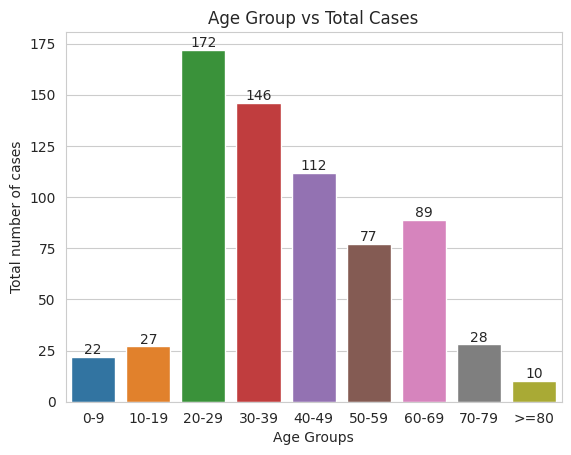

In [182]:
ax=sns.barplot(x='AgeGroup',y='TotalCases',data=age)
ax.bar_label(ax.containers[0])
plt.xlabel('Age Groups')
plt.ylabel('Total number of cases')
plt.title('Age Group vs Total Cases')
plt.show()



---


**Conclusion : Age group 20-29 is most affected by covid followed by 30-39 and 40-49**


---



## Covid_19_india

In [183]:
covid.columns

Index(['Sno', 'Date', 'State/UT', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'TotalCases'],
      dtype='object')

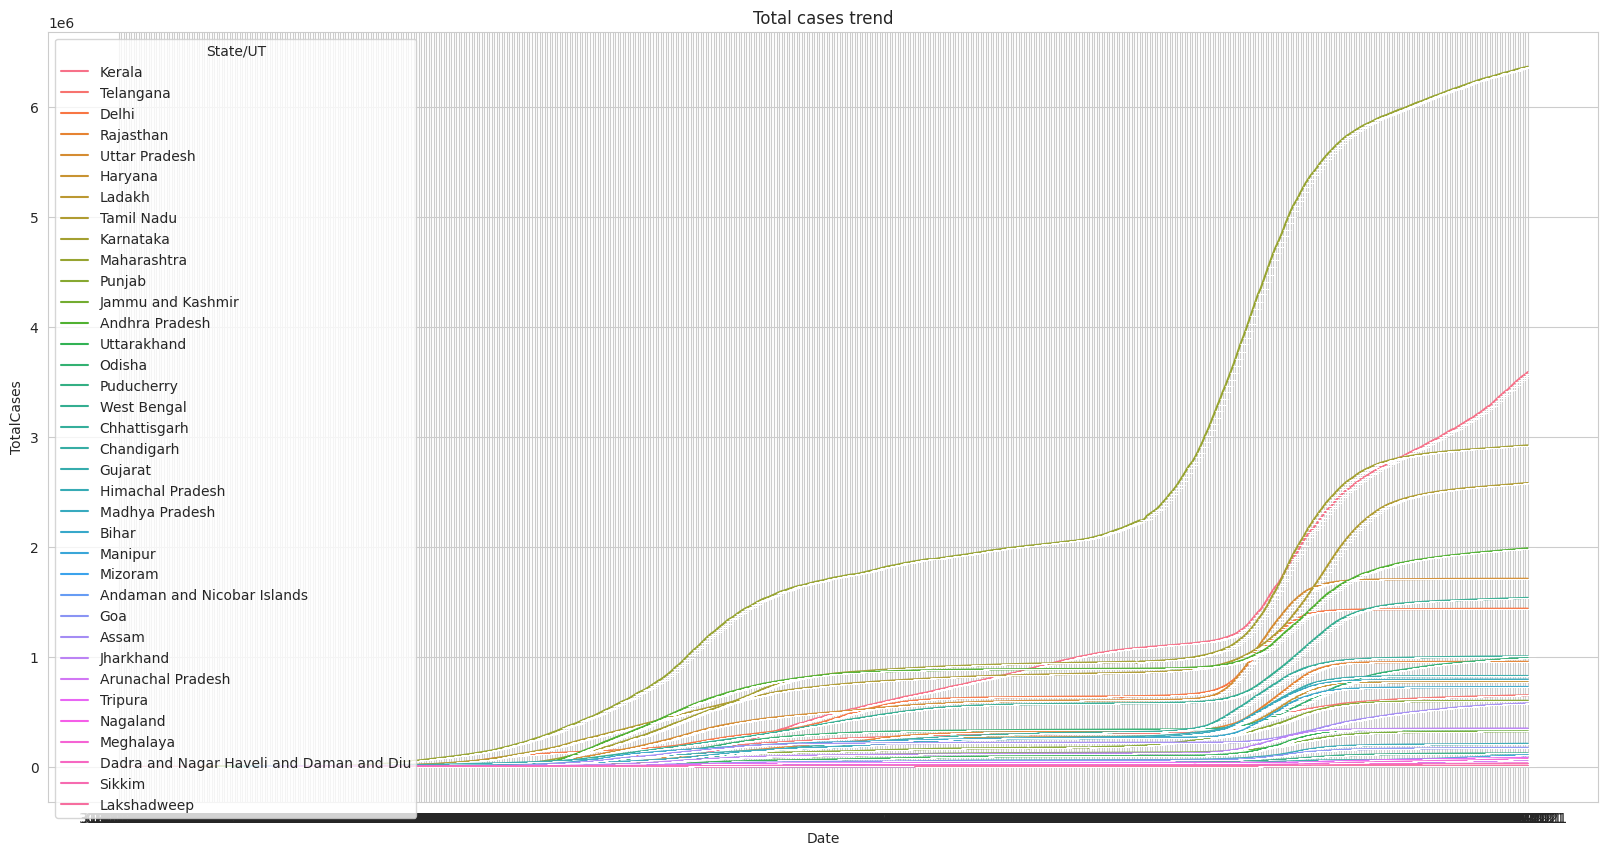

In [184]:
# ploting data trend with date
plt.figure(figsize=[20,10])
sns.lineplot(data=covid.sort_values('Sno'),x='Date',y='TotalCases',err_style=None,hue='State/UT',marker=True)
plt.xlabel('Date')
plt.ylabel('TotalCases')
plt.title('Total cases trend')
plt.show()

---

**Conclusion : Looking at plot,we can say that the data is cummulative. To find out closing data we need to pivot it with max values.**

---



In [185]:
# Pivoting with max values for each state
covid_final=covid.pivot_table(index='State/UT',
                              values=['ConfirmedIndianNational','ConfirmedForeignNational', 'Cured', 'Deaths', 'TotalCases'],
                              aggfunc='max')
covid_final = covid_final.reset_index()  # restting the index column
covid_final = covid_final.sort_values('TotalCases', ascending = False)

<ipython-input-185-8bf07254cd74>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  covid_final=covid.pivot_table(index='State/UT',


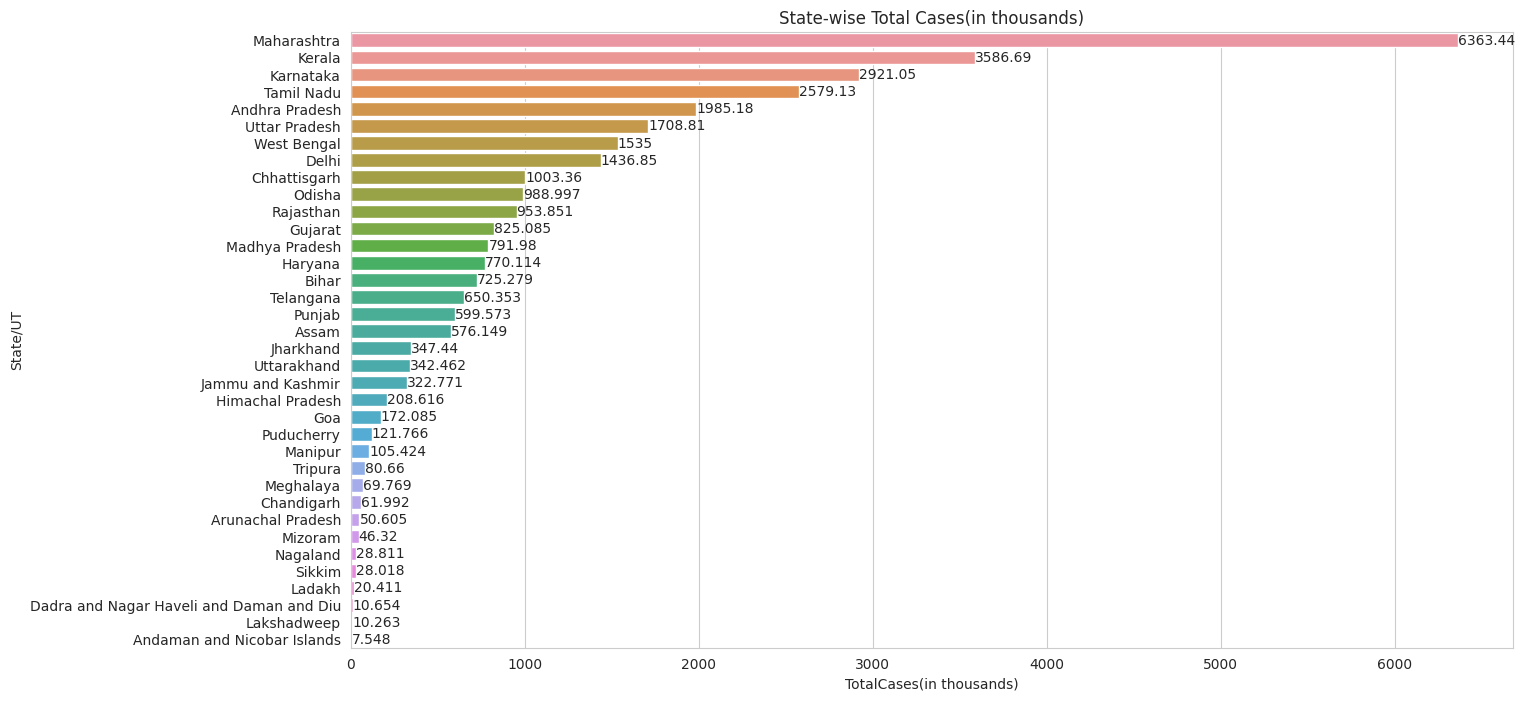

In [186]:
plt.figure(figsize=[15,8])
ax=sns.barplot(x=covid_final['TotalCases']/1000,y='State/UT',data=covid_final.sort_values('TotalCases',ascending=False),errorbar=None)
ax.bar_label(ax.containers[0])
plt.xlabel('TotalCases(in thousands)')
plt.ylabel('State/UT')
plt.title('State-wise Total Cases(in thousands)')
plt.show()

---

**Conclusion : Most affected state considering total number of cases is Maharashtra with around 6.3M cases.**

---

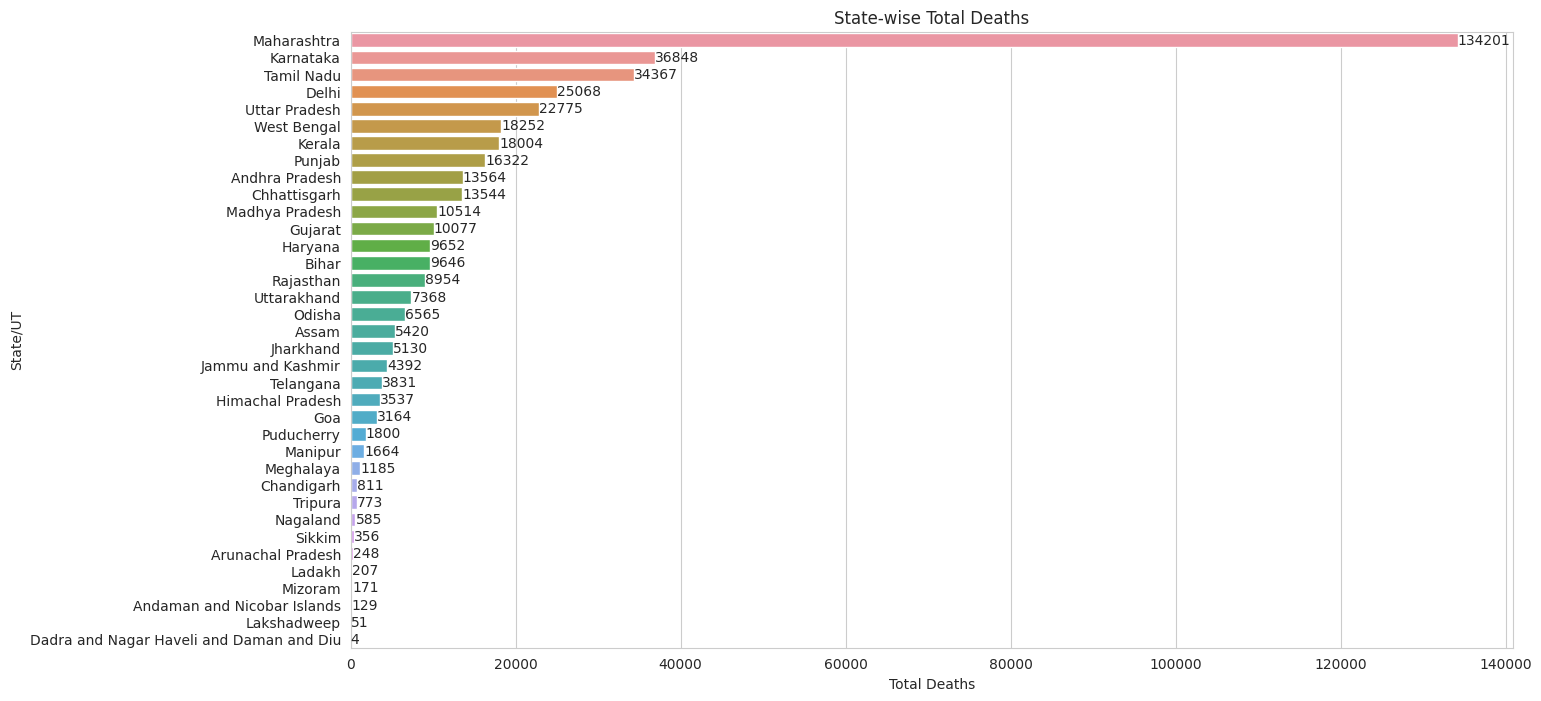

In [187]:
plt.figure(figsize=[15,8])
ax=sns.barplot(x=covid_final['Deaths'],y='State/UT',data=covid_final.sort_values('Deaths',ascending=False),errorbar=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Total Deaths')
plt.ylabel('State/UT')
plt.title('State-wise Total Deaths')
plt.show()

---

**Conclusion : Most affected state considering total number of Deaths is Maharashtra with 134201 deaths.**

---

In [188]:
covid_cf = covid[covid['ConfirmedForeignNational'] != 0]
covid_cf['Date'].max()

'28-03-2020'

**We can see here till 28th March 2020 we have covid cases of foreigners because at this point of time Indian govt. had stopped all the international travel.**
**Let's see till this date how many foreigners effected by covid in india**

In [189]:
covid_cf.groupby('State/UT').agg({'ConfirmedForeignNational' : 'max'}).sort_values(by = ['ConfirmedForeignNational'], ascending = False).reset_index()

,State/UT,ConfirmedForeignNational
0,Haryana,14
1,Rajasthan,14
2,Telangana,11
3,Kerala,8
4,Tamil Nadu,6
5,Maharashtra,3
6,Delhi,1
7,Gujarat,1
8,Uttar Pradesh,1
9,Uttarakhand,1


**The highest number of foreigners are in Haryana & Rajsthan which is 14. There is no impact foreigners with the Covid rate in the state**

In [223]:
covid_final.columns

Index(['State/UT', 'ConfirmedForeignNational', 'Cured', 'Deaths',
       'TotalCases'],
      dtype='object')

In [225]:
covid_final['Mortality_rate']=covid_final['Deaths']/covid_final['TotalCases']

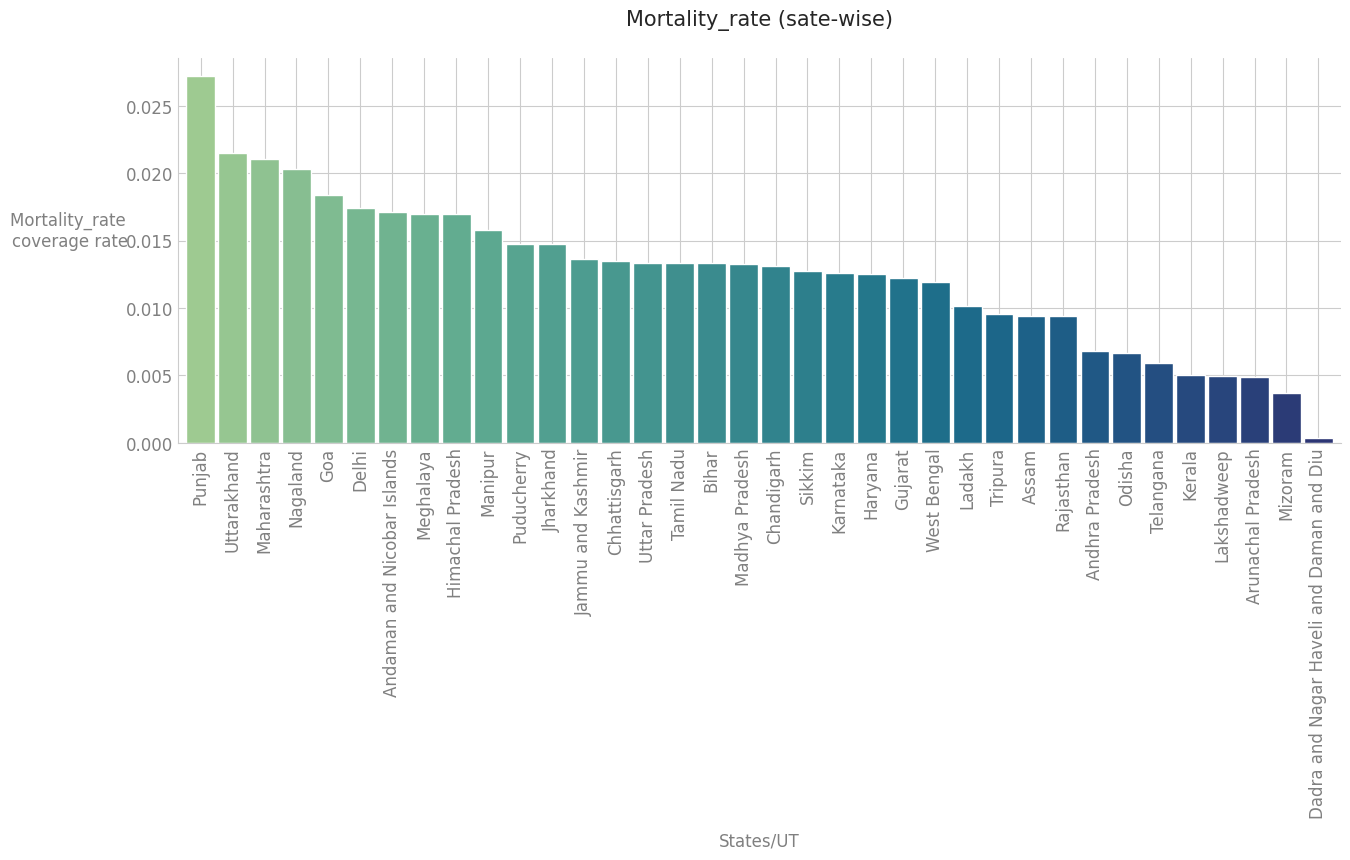

In [226]:
colors = sns.color_palette("crest", n_colors=len(covid_final))
covid_final.sort_values(by = 'Mortality_rate', ascending =False).plot(x='State/UT', y='Mortality_rate', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colors)
plt.title('Mortality_rate (sate-wise)\n', fontsize=15);
plt.xlabel('States/UT' , fontsize = 12, color = 'gray', position = (.5 , 1), labelpad = 10)
plt.ylabel('Mortality_rate \ncoverage rate', rotation = 0, position = (.2 , .4), fontsize = 12, labelpad = 40, color = 'gray')
sns.despine()
ax = plt.gca()
ax.tick_params(axis = 'both' , colors = 'gray', labelsize =12, length = 0)

**Conclusion = Punjab is having highest mortality rate**

## Covid_vaccine

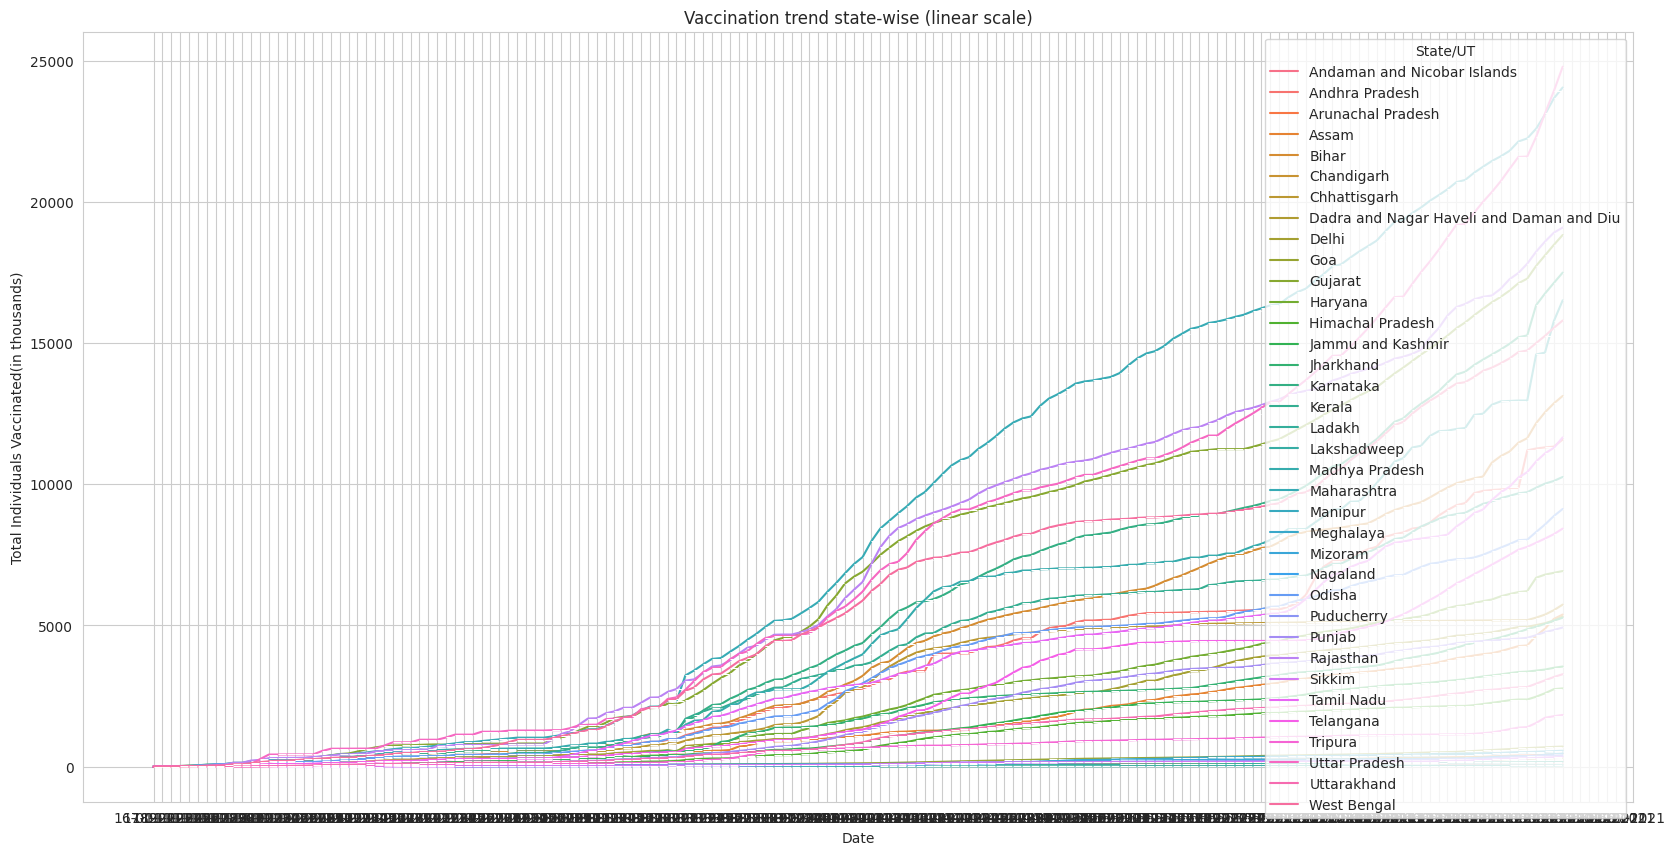

In [190]:
# ploting data trend with date at state/UT level
plt.figure(figsize=[20,10])
sns.lineplot(data=vaccine_state.sort_index(),x='Date',y=vaccine_state['Total Individuals Vaccinated']/1000,err_style=None,hue='State/UT',marker=True)
plt.xlabel('Date')
plt.ylabel('Total Individuals Vaccinated(in thousands)')
plt.title('Vaccination trend state-wise (linear scale)')
plt.show()

---

**Conclusion : Looking at plot,we can say that the data is cummulative. To find out closing data we need to pivot it with max values.**

---

In [191]:
vaccine_state.columns

Index(['Date', 'State/UT', 'Total Doses Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [192]:
# Pivoting with max values for each state
vaccine_state_final=vaccine_state.pivot_table(index='State/UT',
                              values=['Total Doses Administered','Male (Doses Administered)',
                                      'Female (Doses Administered)','Transgender (Doses Administered)',
                                      'CoviShield (Doses Administered)','Sputnik V (Doses Administered)',' Covaxin (Doses Administered)',
                                      'Total Individuals Vaccinated'],
                              aggfunc='max')
vaccine_state_final = vaccine_state_final.reset_index()  # resetting the index column

In [193]:
vaccine_state_final.head(2)

,State/UT,Covaxin (Doses Administered),CoviShield (Doses Administered),Female (Doses Administered),Male (Doses Administered),Sputnik V (Doses Administered),Total Doses Administered,Total Individuals Vaccinated,Transgender (Doses Administered)
0,Andaman and Nicobar Islands,0.0,310643.0,145049.0,165554.0,0.0,310643.0,133533.0,40.0
1,Andhra Pradesh,3804590.0,19988469.0,12986129.0,10852932.0,49836.0,23842895.0,11586263.0,3834.0


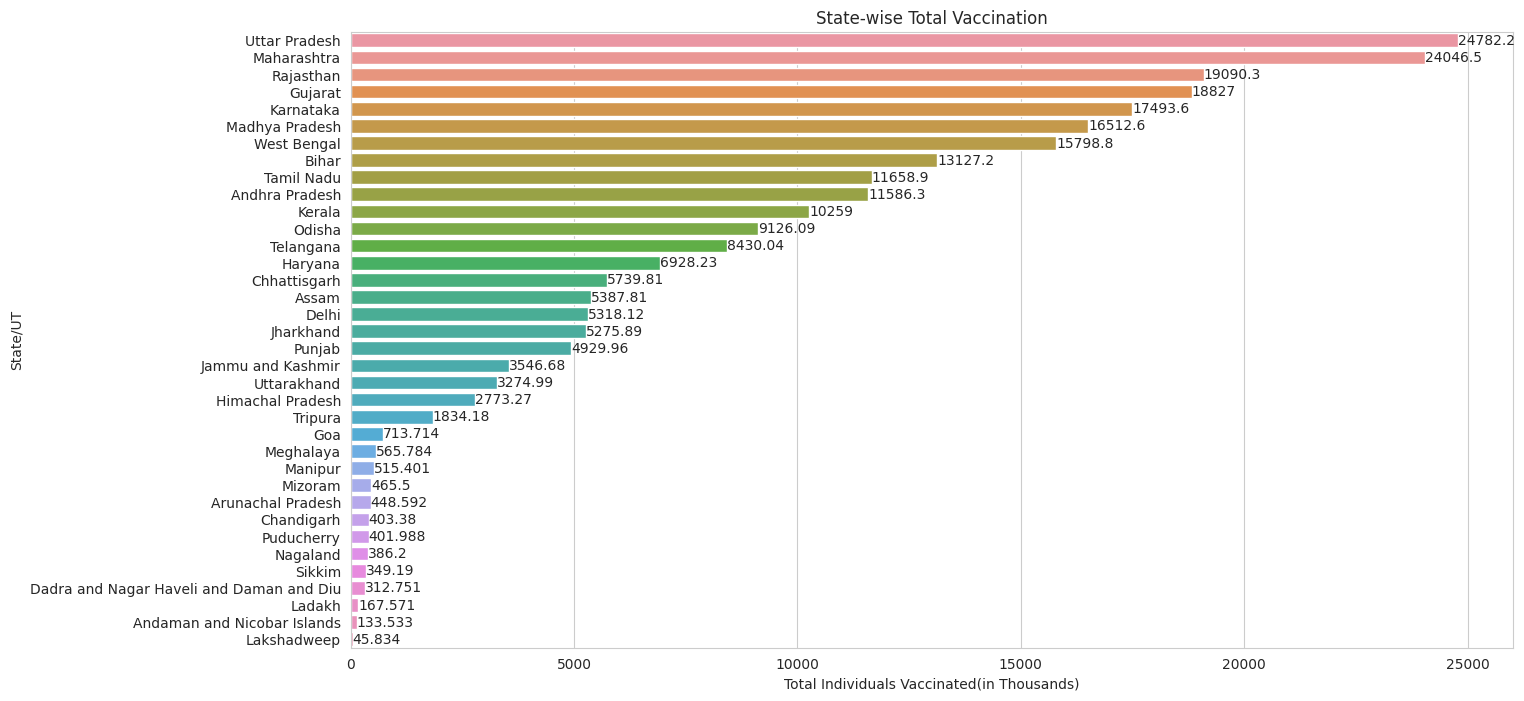

In [194]:
plt.figure(figsize=[15,8])
ax=sns.barplot(x=vaccine_state_final['Total Individuals Vaccinated']/1000,
               y='State/UT',data=vaccine_state_final.sort_values('Total Individuals Vaccinated',ascending=False),
               errorbar=None)
ax.bar_label(ax.containers[0])
plt.xlabel('Total Individuals Vaccinated(in Thousands)')
plt.ylabel('State/UT')
plt.title('State-wise Total Vaccination')
plt.show()

---

**Conclusion : Uttar Pradesh TOP the vaccination program with over 24.78M vaccines doses.**

---

In [195]:
vaccine_new_df = vaccine_state_final.groupby('State/UT').agg({'Total Doses Administered': 'max'}).sort_values(by='Total Doses Administered', ascending=False).reset_index()

In [196]:
pop.head(2)

,Sno,State/UT,Total_population,Rural_population,Urban_population,Gender Ratio,Area(km2),Pop_density(km2)
0,1,Uttar Pradesh,199812341,155317278,44495063,912,240928,828.0
1,2,Maharashtra,112374333,61556074,50818259,929,307713,365.0


In [197]:
vaccine_pop_df = pd.merge(vaccine_new_df , pop[['State/UT','Total_population']], on = 'State/UT')
vaccine_pop_df['Vaccination coverage'] = (vaccine_pop_df['Total Doses Administered'] / vaccine_pop_df['Total_population']).round(2)
vaccine_pop_df.sort_values(by = 'Vaccination coverage', ascending =False).head()

,State/UT,Total Doses Administered,Total_population,Vaccination coverage
31,Dadra and Nagar Haveli and Daman and Diu,665221.0,585764,1.14
35,Lakshadweep,68295.0,64473,1.06
32,Sikkim,649389.0,610577,1.06
24,Goa,1396911.0,1458545,0.96
34,Ladakh,259036.0,274000,0.95


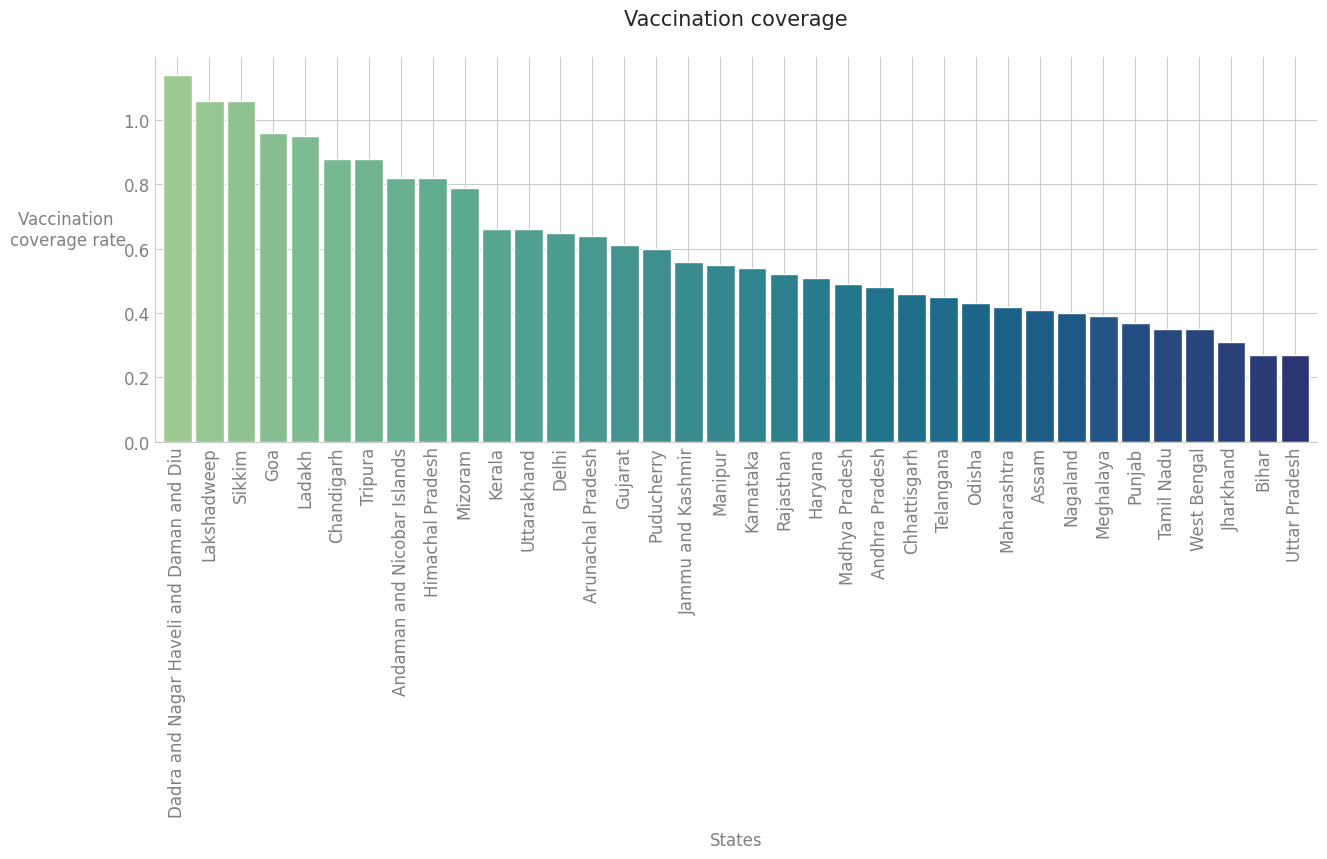

In [198]:
colors = sns.color_palette("crest", n_colors=len(vaccine_state_final))
vaccine_pop_df.sort_values(by = 'Vaccination coverage', ascending =False).plot(x='State/UT', y='Vaccination coverage', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colors)
plt.title('Vaccination coverage\n', fontsize=15);
plt.xlabel('States' , fontsize = 12, color = 'gray', position = (.5 , 1), labelpad = 10)
plt.ylabel('Vaccination \ncoverage rate', rotation = 0, position = (.2 , .4), fontsize = 12, labelpad = 40, color = 'gray')
sns.despine()
ax = plt.gca()
ax.tick_params(axis = 'both' , colors = 'gray', labelsize =12, length = 0)

**Conclusion : We can see Daman&Diu, Lakshdeep, Sikkim & Goa have higher vaccination coverage rates indicate that these states & UTs have greater protection against COVID-19 and lower transmission rates.**

In [199]:
vaccine_state_final.columns

Index(['State/UT', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Female (Doses Administered)',
       'Male (Doses Administered)', 'Sputnik V (Doses Administered)',
       'Total Doses Administered', 'Total Individuals Vaccinated',
       'Transgender (Doses Administered)'],
      dtype='object')

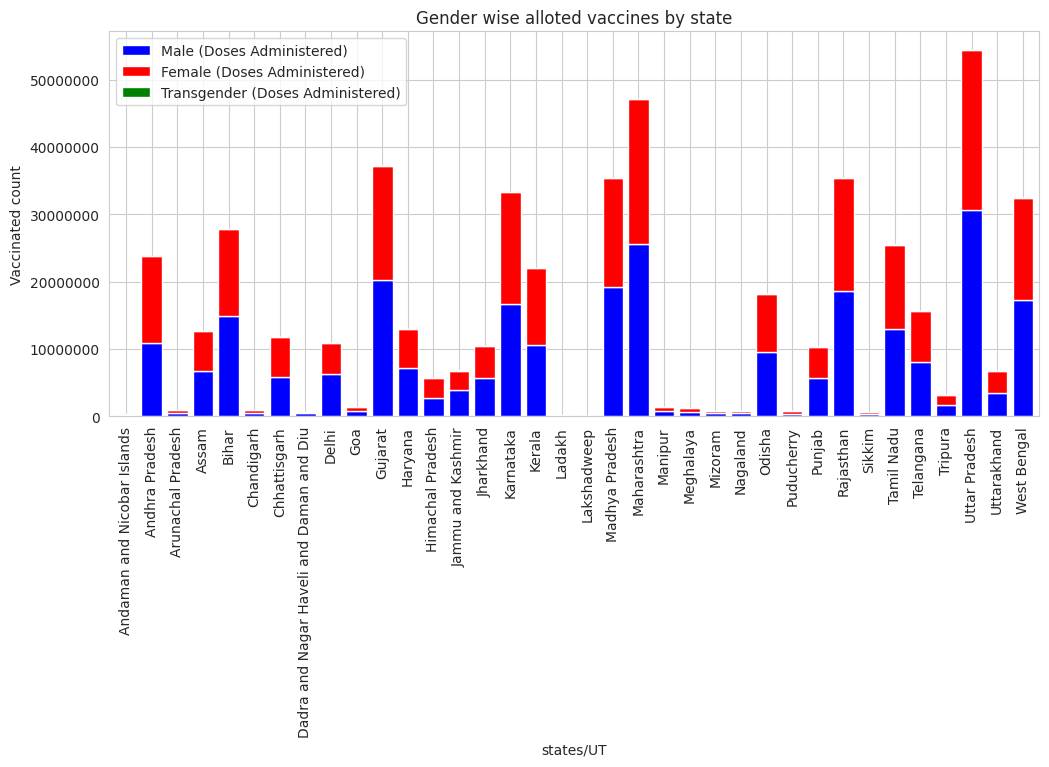

In [200]:
# Ploting Gender wise Individuals vaccinated
vaccine_state_final_gp1 = vaccine_state_final.loc[:,["State/UT","Male (Doses Administered)","Female (Doses Administered)","Transgender (Doses Administered)"]].groupby("State/UT")[["Male (Doses Administered)","Female (Doses Administered)","Transgender (Doses Administered)"]].sum()
vaccine_state_final_gp1.plot(kind="bar",stacked=True,figsize=(12, 5),color=["blue","red","green"],width=0.8)
plt.title('Gender wise alloted vaccines by state')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('states/UT')
plt.ylabel('Vaccinated count')
plt.show()


**Conclusion : Vaccine are fairly distributed among male & females; Although in UP & Maharashtra male allotted vaccine are more as compared to female.**

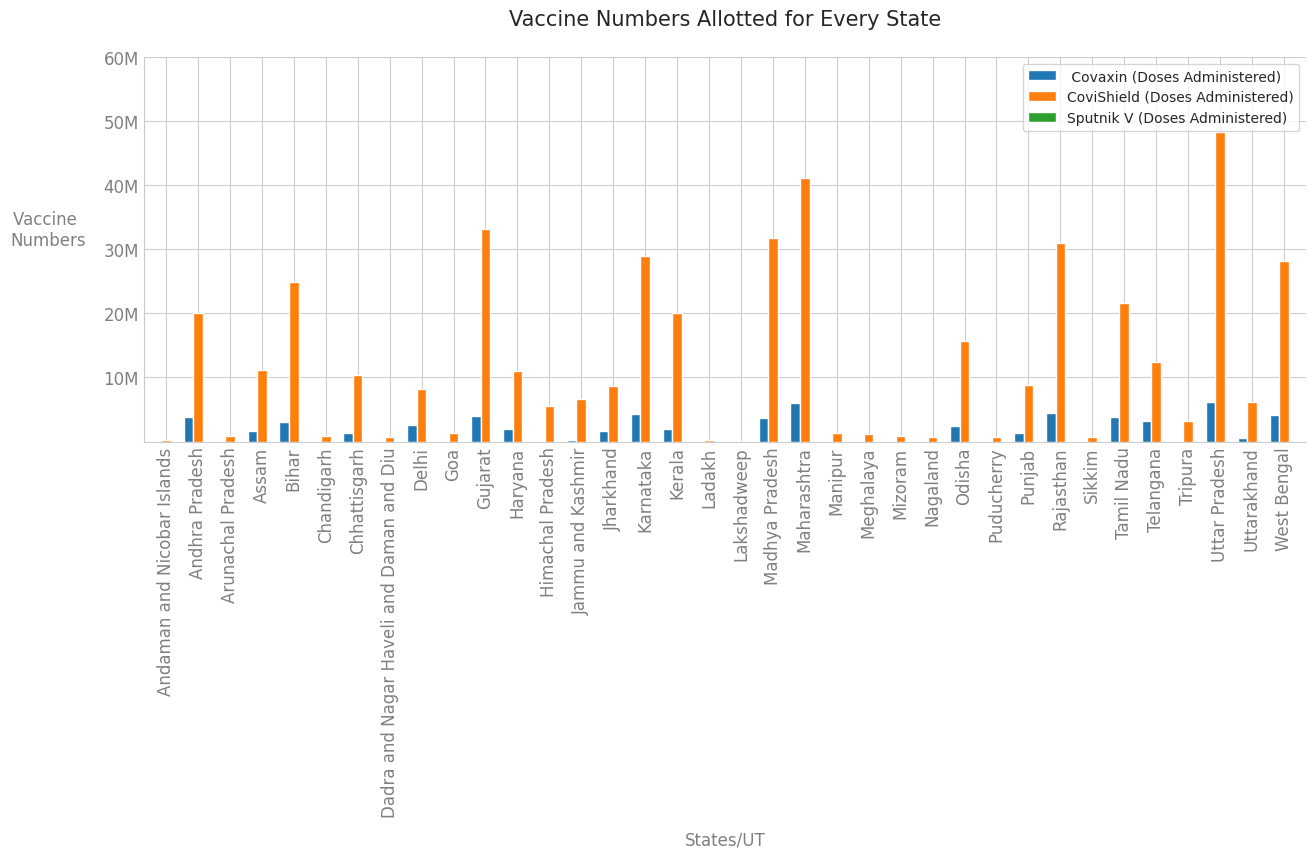

In [201]:
vaccine_state_final.groupby('State/UT').agg({' Covaxin (Doses Administered)' : 'max', 'CoviShield (Doses Administered)': 'max', 'Sputnik V (Doses Administered)': 'max' }).plot( kind='bar',
        figsize=(15,5), width = .9)
plt.title('Vaccine Numbers Allotted for Every State\n', fontsize=15);
plt.xlabel('States/UT' , fontsize = 12, color = 'gray', position = (.5 , 1), labelpad = 10)
plt.ylabel('Vaccine \nNumbers' , rotation = 0, position = (1 , .4), fontsize = 12, labelpad = 40, color = 'gray')
sns.despine()

ax = plt.gca()
ax.tick_params(axis = 'both' , colors = 'gray', labelsize =12, length = 0)

y = ax.get_yticks()
plt.yticks(y[1:])

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x,p: format(str(int(x/1000000)) + 'M')))

**Conclusion : Most allotted of the vaccine are Covishield**

## Hospital beds

In [202]:
beds_state.columns

Index(['Sno', 'State/UT', 'NumPrimaryHealthCenters_HMIS',
       'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
       'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS',
       'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18'],
      dtype='object')

In [203]:
pop['State/UT'].unique()

array(['Uttar Pradesh', 'Maharashtra', 'Bihar', 'West Bengal',
       'Madhya Pradesh', 'Tamil Nadu', 'Rajasthan', 'Karnataka',
       'Gujarat', 'Andhra Pradesh', 'Odisha', 'Telangana', 'Kerala',
       'Jharkhand', 'Assam', 'Punjab', 'Chhattisgarh', 'Haryana',
       'Uttarakhand', 'Himachal Pradesh', 'Tripura', 'Meghalaya',
       'Manipur', 'Nagaland', 'Goa', 'Arunachal Pradesh', 'Mizoram',
       'Sikkim', 'Delhi', 'Jammu and Kashmir', 'Puducherry', 'Chandigarh',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Ladakh', 'Lakshadweep'],
      dtype=object)

In [204]:
hospital_df = pd.merge(beds_state , pop[['State/UT','Total_population', 'Rural_population', 'Urban_population']], on = 'State/UT')


In [205]:
hospital_df['Health Facilities to Population Ratio'] = hospital_df['TotalPublicHealthFacilities_HMIS']/hospital_df['Total_population']
hospital_df['Beds to Population Ratio'] = hospital_df['NumPublicBeds_HMIS']/hospital_df['Total_population']
hospital_df.sort_values(by = 'Beds to Population Ratio').head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Total_population,Rural_population,Urban_population,Health Facilities to Population Ratio,Beds to Population Ratio
4,5,Bihar,2007,63,33,43,2146,17796,930,6083,103,5936,104099452,92341436,11758016,0.000021,0.000171
13,16,Jharkhand,343,179,13,23,558,7404,519,5842,36,4942,32988134,25055073,7933061,0.000017,0.000224
31,34,Uttar Pradesh,3277,671,0,174,4122,58310,4442,39104,193,37156,199812341,155317278,44495063,0.000021,0.000292
23,26,Odisha,1360,377,27,35,1799,16497,1655,6339,149,12180,41974218,34970562,7003656,0.000043,0.000393
25,28,Punjab,521,146,47,28,742,13527,510,5805,172,12128,27743338,17344192,10399146,0.000027,0.000488


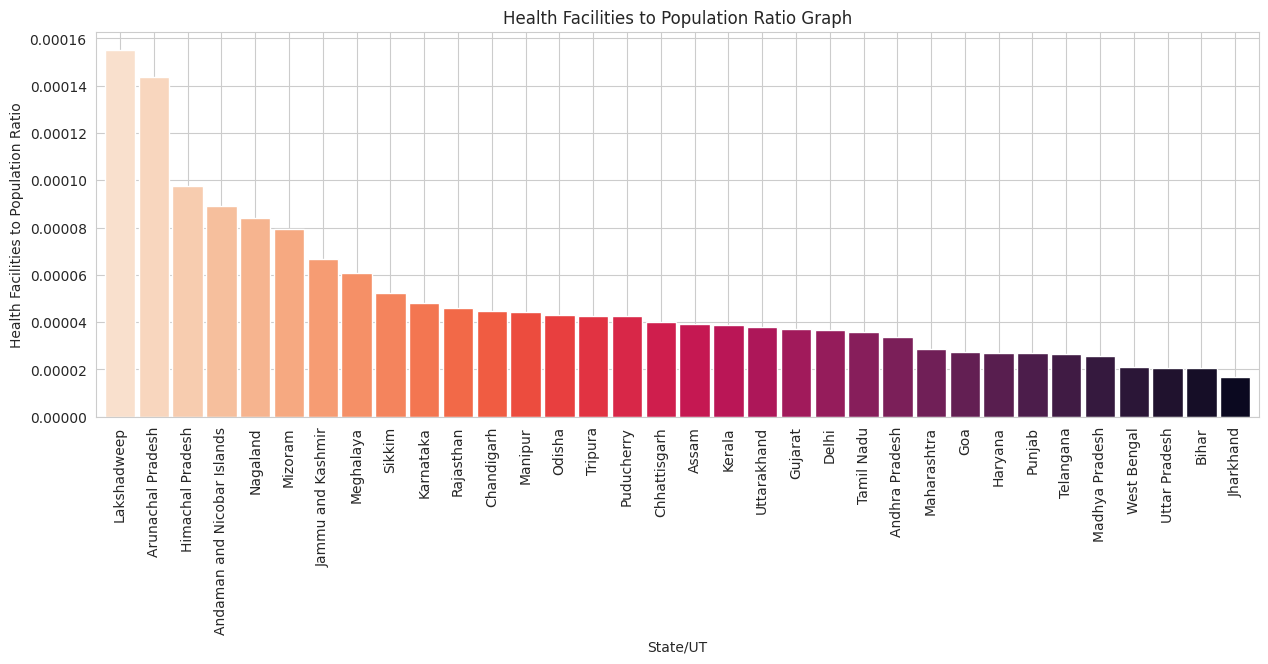

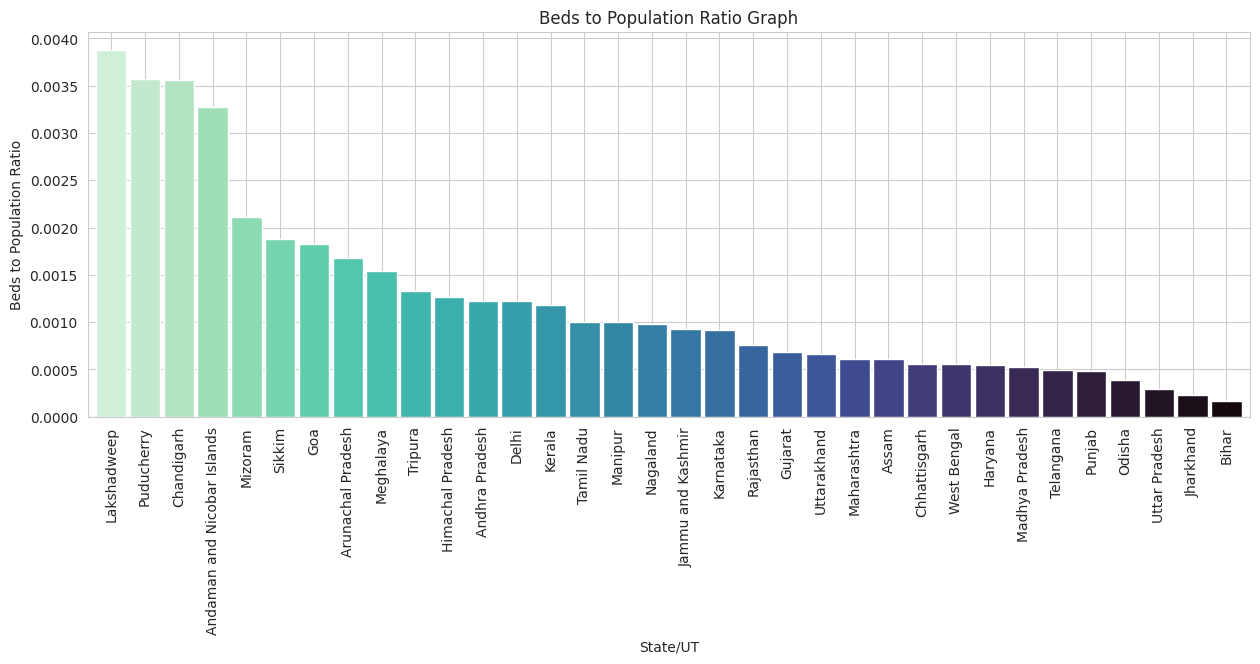

In [206]:
colors = sns.color_palette("rocket_r", n_colors=len(hospital_df))
colours = sns.color_palette("mako_r", n_colors=len(hospital_df))
hospital_df.sort_values(by = 'Health Facilities to Population Ratio', ascending = False).plot(x='State/UT', y='Health Facilities to Population Ratio', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colors)
plt.ylabel('Health Facilities to Population Ratio')
plt.title('Health Facilities to Population Ratio Graph')
#print(___________________________________________________________________________________)
hospital_df.sort_values(by = 'Beds to Population Ratio', ascending = False).plot(x='State/UT', y='Beds to Population Ratio', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colours)
plt.ylabel('Beds to Population Ratio')
plt.title('Beds to Population Ratio Graph')
plt.show()
    


**Colclusion : UP, Jharkhand & Bihar Having lowest health facility to population ratio as well as no of beds ratio.**

In [207]:
lab.columns

Index(['Lab', 'Address', 'pincode', 'City', 'State/UT', 'InstituteType'], dtype='object')

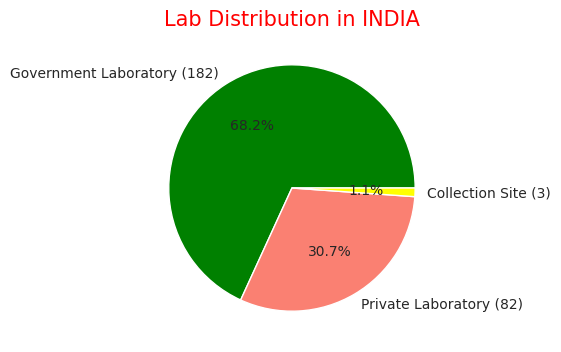

In [208]:
value_counts = lab.InstituteType.value_counts()
labels = [f"{label} ({value_counts[label]})" for label in value_counts.index]

fig, ax = plt.subplots(figsize=(7, 4))
ax.pie(
    value_counts.values, labels=labels, autopct='%0.1f%%',
    startangle=0, textprops={'fontsize': 10}, wedgeprops={'edgecolor': '#fff'},
    colors=["green","salmon", "yellow"]
)
ax.set_title('Lab Distribution in INDIA', fontsize=15, color='red')
plt.show()

In [209]:
lab.columns

Index(['Lab', 'Address', 'pincode', 'City', 'State/UT', 'InstituteType'], dtype='object')

In [210]:
# Pivoting with max values for each state
lab_final=lab.pivot_table(index='State/UT',
                              values=['InstituteType'],
                              aggfunc='count')
lab_final = lab_final.reset_index()  # resetting the index column

In [211]:
lab_final.head(1)

,State/UT,InstituteType
0,Andaman and Nicobar Islands,1


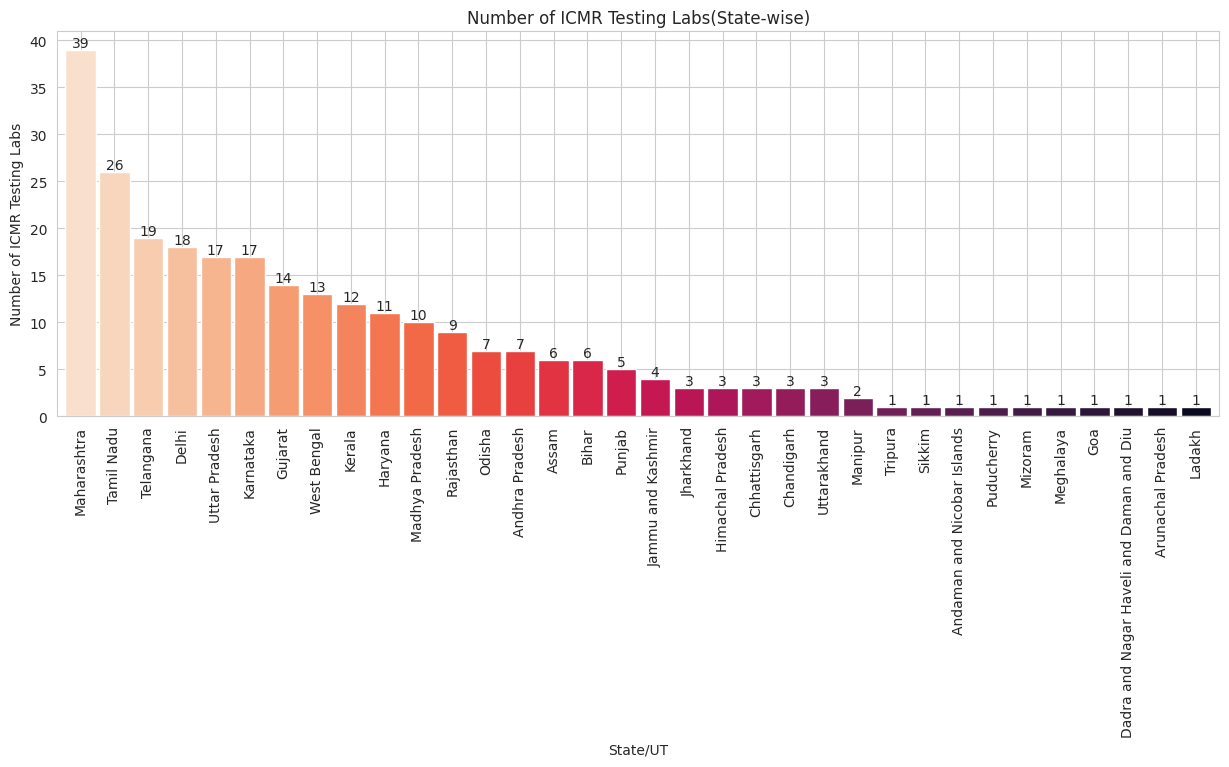

In [212]:
colors = sns.color_palette("rocket_r", n_colors=len(lab_final))
ax=lab_final.sort_values(by = 'InstituteType', ascending = False).plot(x='State/UT', y='InstituteType', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colors)
ax.bar_label(ax.containers[0])
plt.title("Number of ICMR Testing Labs(State-wise)")
plt.xlabel('State/UT')
plt.ylabel('Number of ICMR Testing Labs')
plt.show()

**Conslusion : Maharshtra has max number of Institutes followed by tamil Nadu & Telangana**

In [213]:
pop.head(1)

,Sno,State/UT,Total_population,Rural_population,Urban_population,Gender Ratio,Area(km2),Pop_density(km2)
0,1,Uttar Pradesh,199812341,155317278,44495063,912,240928,828.0


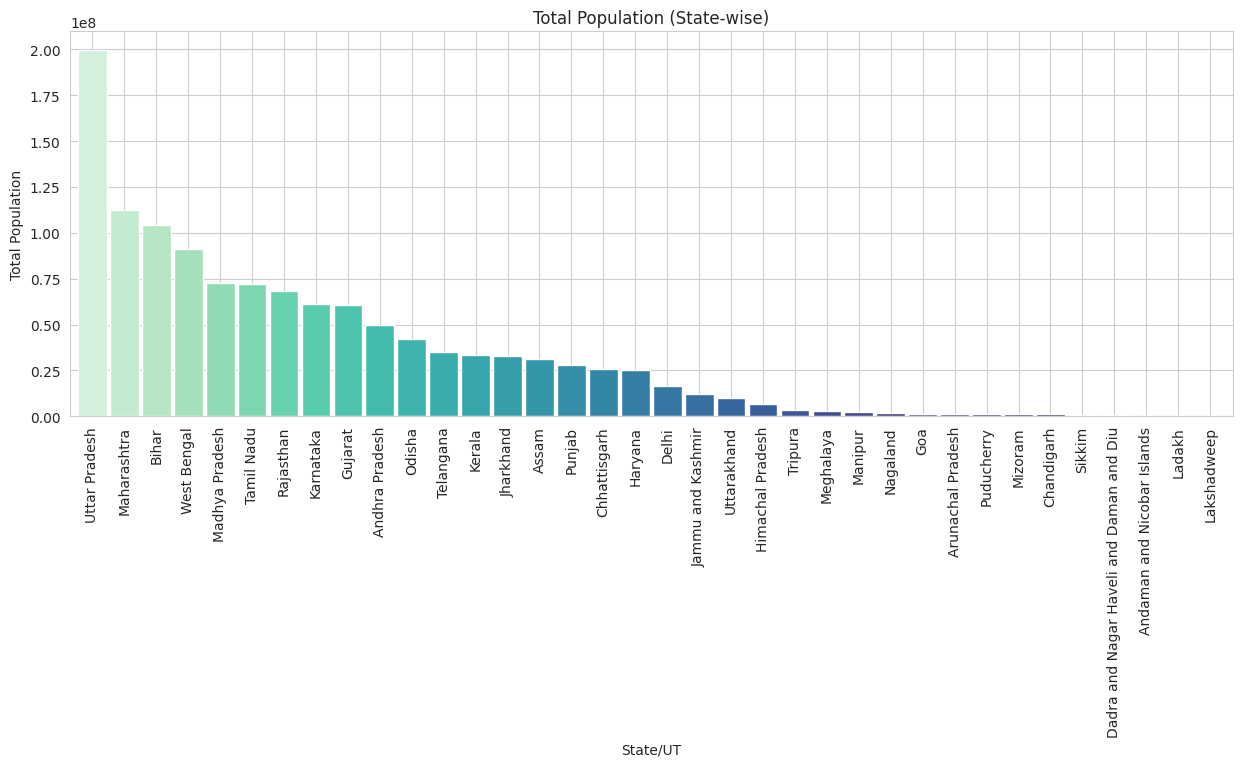

In [214]:
colours = sns.color_palette("mako_r", n_colors=len(pop))
ax=pop.sort_values(by = 'Total_population', ascending = False).plot(x='State/UT', y='Total_population', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colours)
#ax.bar_label(ax.containers[0])
plt.title("Total Population (State-wise)")
plt.xlabel("State/UT")
plt.ylabel("Total Population")
plt.show()


**Conclusion : UP is most populated state followed by Mahrashtra & Bihar**

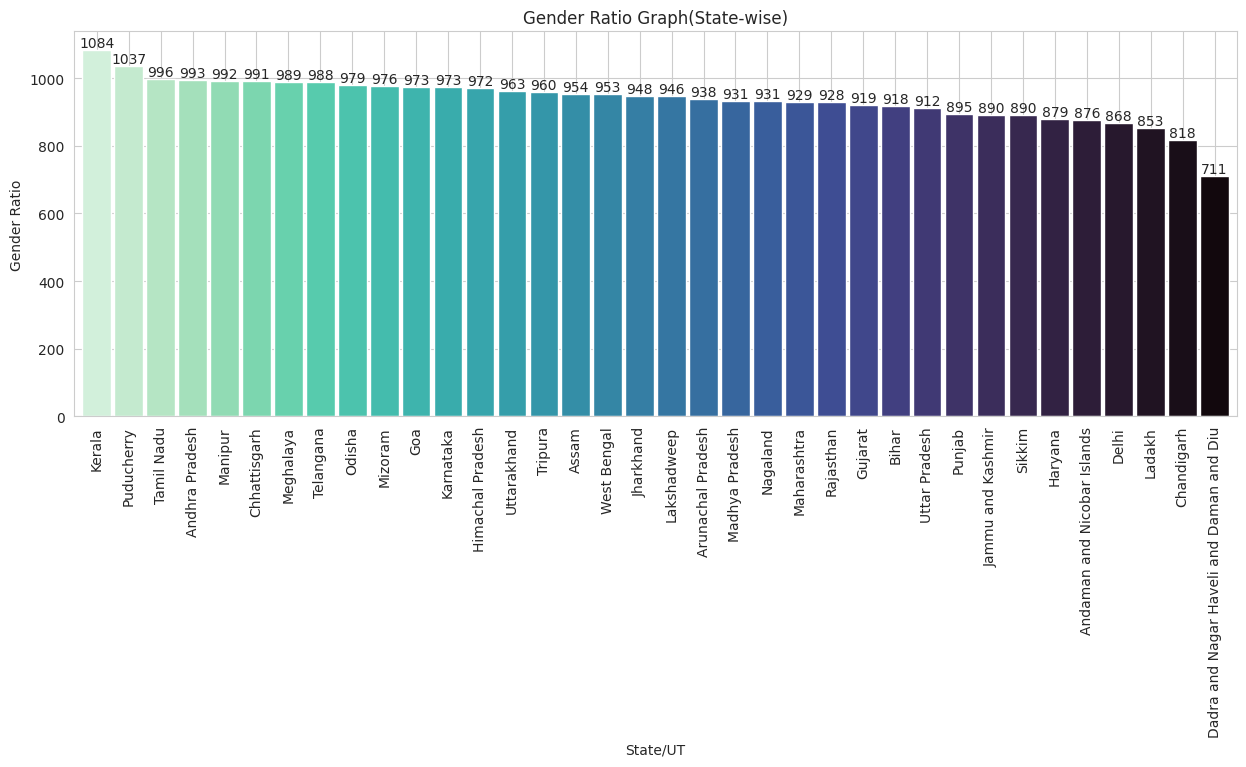

In [215]:
colours = sns.color_palette("mako_r", n_colors=len(pop))
ax=pop.sort_values(by = 'Gender Ratio', ascending = False).plot(x='State/UT', y='Gender Ratio', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colours)
ax.bar_label(ax.containers[0])
plt.title("Gender Ratio Graph(State-wise)")
plt.xlabel("State/UT")
plt.ylabel("Gender Ratio")
plt.show()


**Kerala is having best gender ratio followed by Puducherry & tamil Nadu.**

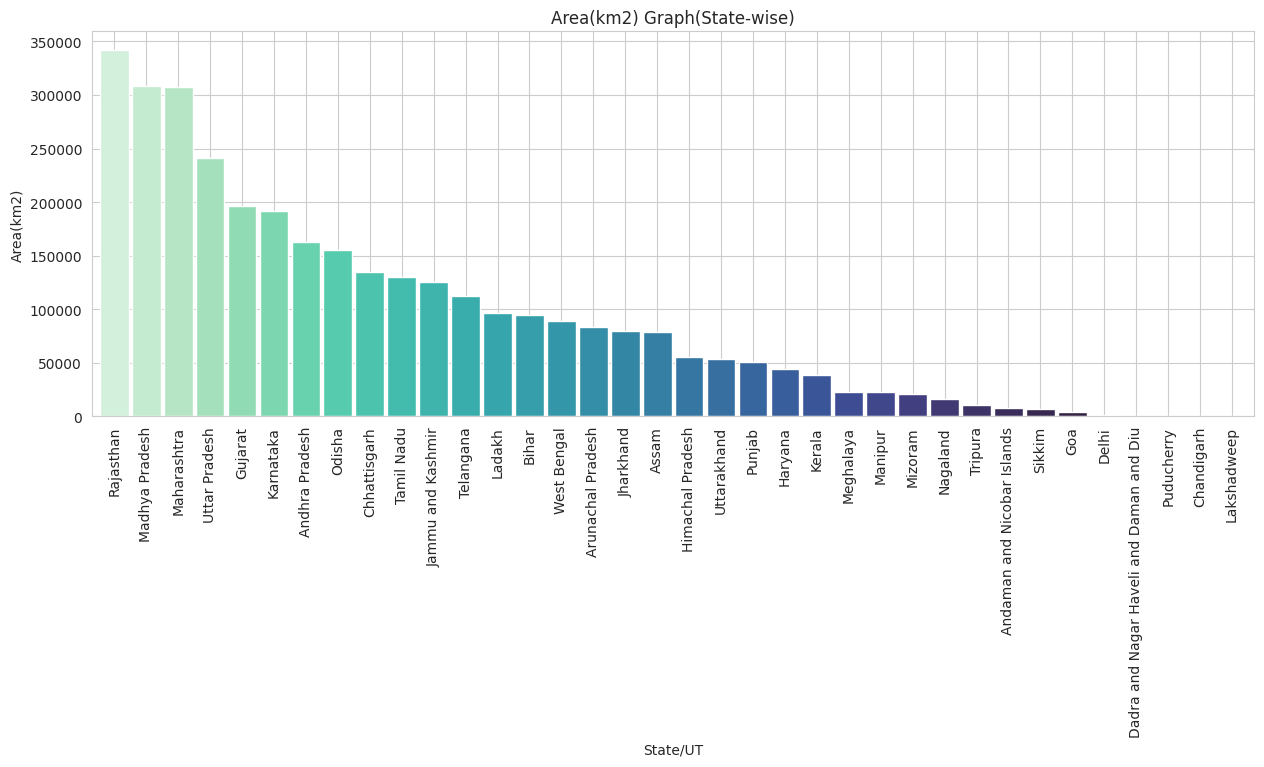

In [216]:
colours = sns.color_palette("mako_r", n_colors=len(pop))
ax=pop.sort_values(by = 'Area(km2)', ascending = False).plot(x='State/UT', y='Area(km2)', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colours)
#ax.bar_label(ax.containers[0])
plt.title("Area(km2) Graph(State-wise)")
plt.xlabel("State/UT")
plt.ylabel("Area(km2)")
plt.show()

**Conclusion : Rajasthan is beggest state considering area followed by Madhya Pradesh & Maharashtra.**

In [217]:
test.dtypes

Date            object
State/UT        object
TotalSamples     int64
dtype: object

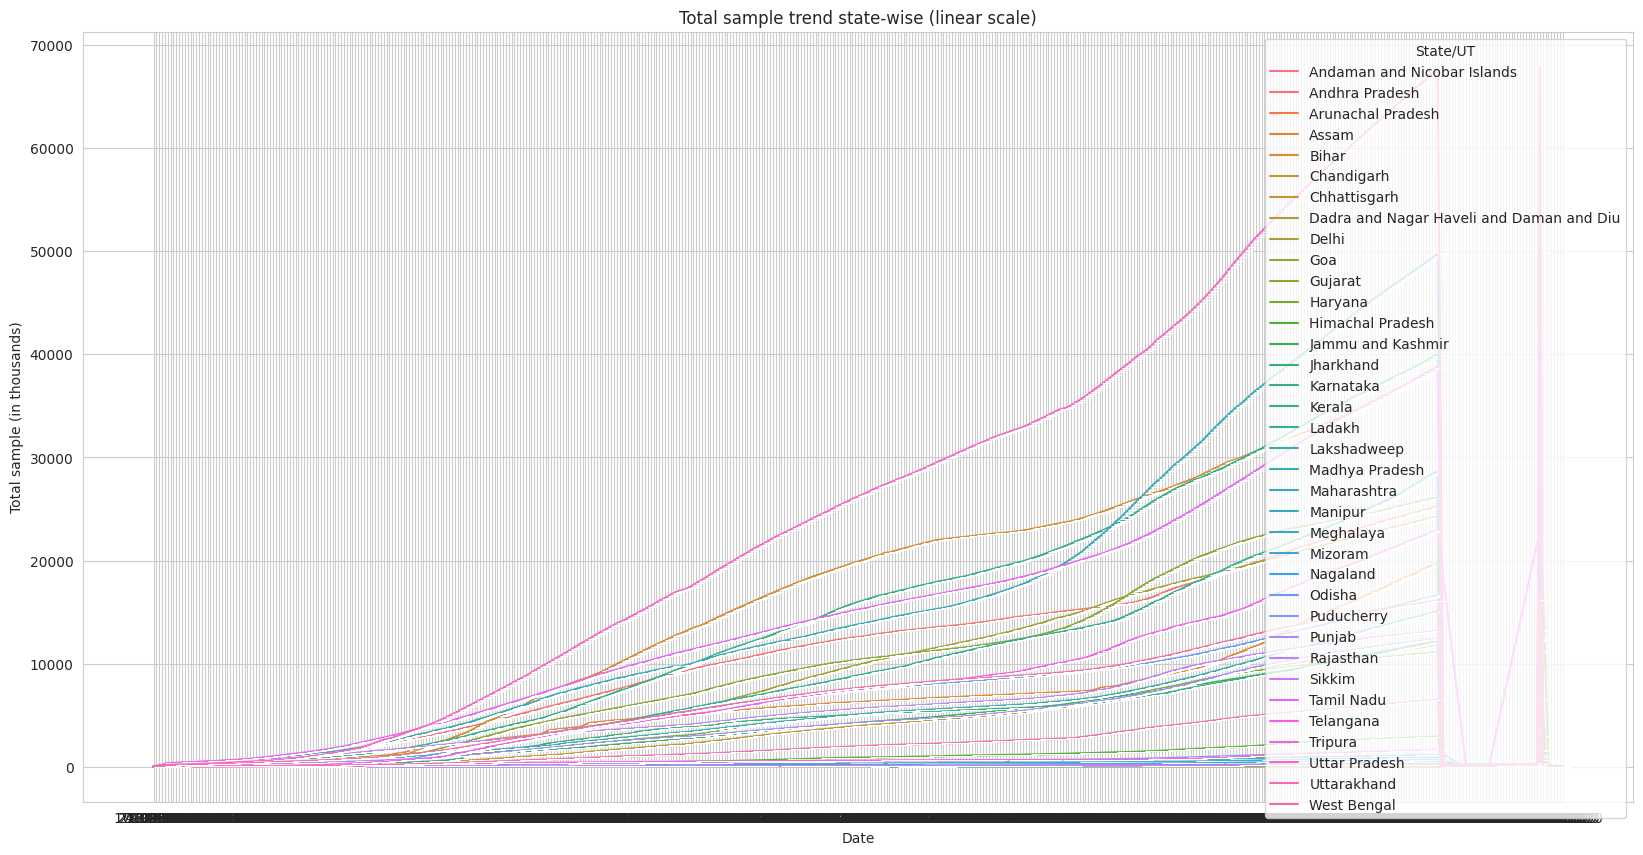

In [218]:
# ploting data trend with date at state/UT level
plt.figure(figsize=[20,10])
sns.lineplot(data=test.sort_index(),x='Date',y=test['TotalSamples']/1000,err_style=None,hue='State/UT',marker=True)
plt.xlabel('Date')
plt.ylabel('Total sample (in thousands)')
plt.title('Total sample trend state-wise (linear scale)')
plt.show()

**Conclusion : Data is cummulative**

In [219]:
# Pivoting with max values for each state
test_final=test.pivot_table(index='State/UT',
                              values=['TotalSamples'],
                              aggfunc='max')
test_final = test_final.reset_index()  # resetting the index column

In [220]:
test_ratio = pd.merge(test_final,pop[['State/UT','Total_population']],on='State/UT')

test_ratio['sample_ratio']=test_ratio['TotalSamples']/test_ratio['Total_population']
test_ratio.head(1)

,State/UT,TotalSamples,Total_population,sample_ratio
0,Andaman and Nicobar Islands,452587,380581,1.1892


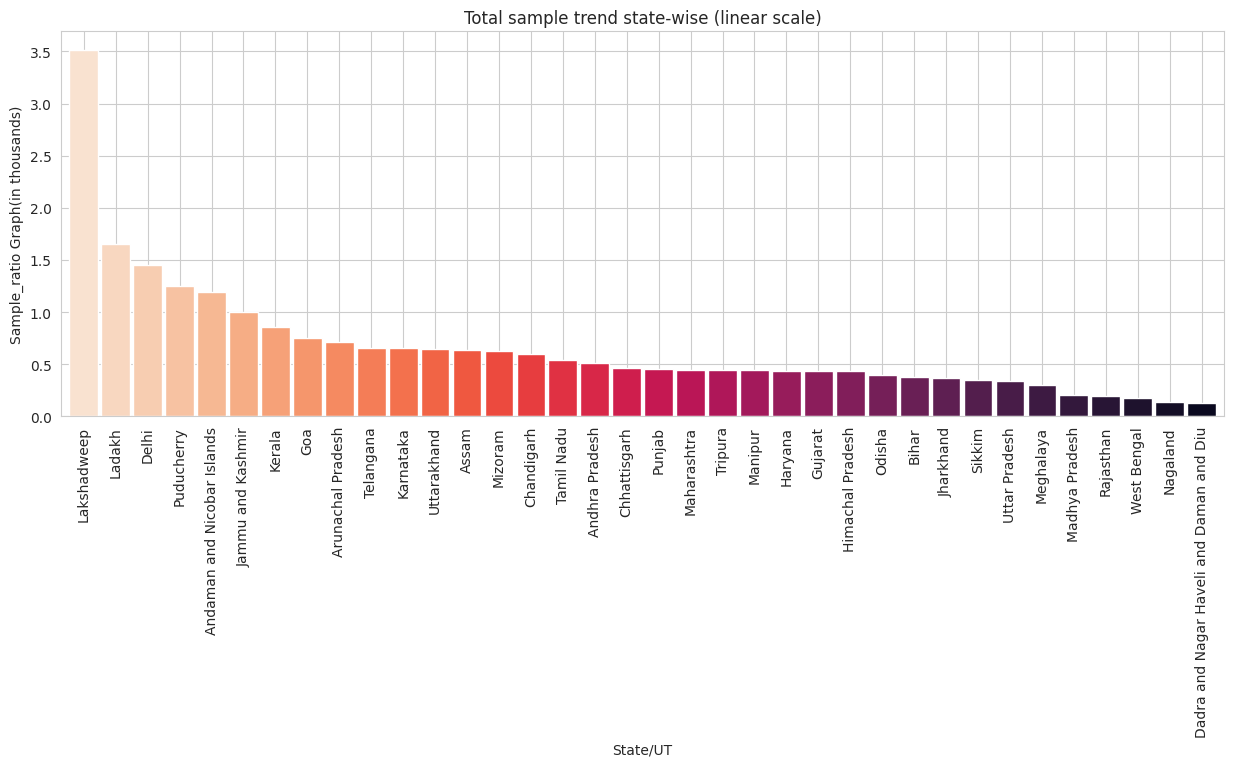

In [221]:
colors = sns.color_palette("rocket_r", n_colors=len(test_ratio))
ax=test_ratio.sort_values(by = 'sample_ratio', ascending = False).plot(x='State/UT', y='sample_ratio', kind='bar',
        figsize=(15,5), legend=False, width = .9, color = colors)

plt.xlabel("State/UT")
plt.ylabel('Sample_ratio Graph(in thousands)')
plt.title('Total sample trend state-wise (linear scale)')
plt.show()

**Conclusion : "Lakshadweep, Ladakh, Delhi, puducherry & Andman and Nicobar island" these UTs having more sample collected than population.**

#Conclusion Summary



**1. Age group 20-29 is most affected by covid followed by 30-39 and 40-49**

**2. Most affected state considering total number of cases is Maharashtra with around 6.3M cases.**

**3. Most affected state considering total number of Deaths is Maharashtra with 134201 deaths.**

**4. We can see  till 28th March 2020 we have covid cases of foreigners because at this point of time Indian govt. had stopped all the international travel.The highest number of foreigners are in Haryana & Rajsthan which is 14. There is no huge impact of foreigners with the Covid rate in the state**

**5. Uttar Pradesh TOP the vaccination program with over 24.78M vaccines doses.**

**6.We can see Daman&Diu, Lakshdeep, Sikkim & Goa have higher vaccination coverage rates indicate that these states & UTs have greater protection against COVID-19 and lower transmission rates.**

**7. Vaccine are fairly distributed among male & females; Although in UP & Maharashtra male allotted vaccine are more as compared to female.**

**8. Most allotted of the vaccine is Covishield**

**9. UP, Jharkhand & Bihar Having poorest 'health facility to population ratio' as well as 'no of beds to population ratio'.**
	
**10. Maharshtra has max number of Institutes followed by tamil Nadu & Telangana**

**11. UP is most populated state followed by Mahrashtra & Bihar**

**12. Kerala is having best gender ratio followed by Puducherry & tamil Nadu.**

**13. Rajasthan is biggest state considering area followed by Madhya Pradesh & Maharashtra.**

**14. "Lakshadweep, Ladakh, Delhi, puducherry & Andman and Nicobar island" these UTs having more sample collected than population.**

**15. Punjab is having highest mortality rate**




---


*In this project, we analyzed the COVID-19 data from various Indian states to understand the impact of the virus and the response of the states to contain it. We identified the states that were affected the most by the virus, the relationship between foreign travel and the COVID-19 rate, and the states that were most effective in managing the pandemic. Our analysis also provided insights into the age-group, mortality rate, and state population that can help understand the impact of the virus and response of the states.*


---

